# HYPER PARAMETER TUNING AND CIFAR-10
----
### **¿Cual es el objetivo de este trabajo?**
<br>
Este trabajo/repositorio, tiene como objetivo personal familiarizarme con el deep learning, y ayudar a difundir lo que he aprendido con respecto al mismo tema.

Además, lo que uno se debería llevar luego de leer este trabajo es lo siguiente:

- Familiarizarse con los modelos
- Familiarizarse con híper-parámetros y bloques constructivos de las redes neuronales
- Aprender a contruir tus propias redes neuronales
- Base bien formada sobre las redes neuronales


# ¿Qué voy a realizar?

Decidí realizar este trabajo en un formato de "actividades", ya que creo que refleja mejor el "¿Por qué? hago tal cosa.

Primero voy a realizar mi análisis con un dataset de una funciona sinosoidal, para luego en la actividad 6, utilizar el dataset de CIFAR 10 y en el 7 uno de abejas y hormias, siendo esto ultimos, dataset de imágenes.
<br>
### Actividades:

1. [Evaluar el uso de regularización. Evaluar el uso de función de costo L1. Hacer una búsqueda en grilla de los híper-parámetros (``learning_rate``, ``weight_decay``, ``epochs``).](#activity1)

2. Implementar y entrenar un modelo de red feedforward de dos capas como la segunda de la figura. Experimentar con distintos números de nodos en la capa oculta. Repetir la búsqueda de tasa de aprendizaje (learning rate) del punto anterior.

3. Con esta red neuronal, experimentar distintas funciones de activación, como la tangente hiperbólica (Tanh) o ReLU (buscar las mismas, por ejemplo, en la documentación de Pytorch).

4. Evaluar cómo cambia la convergencia de esta red neuronal con distintos valores de batch size y learning rate.

5. A partir de la versión con mini-batches, modificar el bucle de entrenamiento para que, sin modificar la iteración sobre el DataLoader, implemente descenso de gradiente estándar (*vanilla*) (actualización utilizando el gradiente sobre la función de costo acumulada, tras recorrer todo el dataset).
(Se encuentra en este notebook:)


Estas primeras cinco actividades, serán llevadas a cabo con el siguiente dataset:

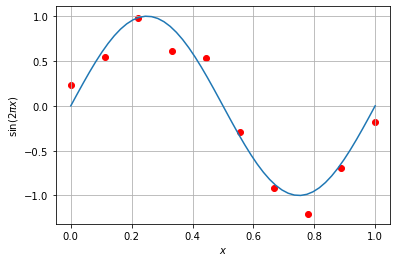

In [1]:
from funciones_utiles import create_sinusoidal_data as create_data
import matplotlib.pyplot as plt

x_train, y_train, x_val, y_val = create_data()

plt.plot(x_val, y_val)
plt.scatter(x_train, y_train, color='red')
plt.ylabel('$\sin(2 \pi x)$')
plt.xlabel('$x$')
plt.grid()

Para la primera parte del trabajo voy a utilizar un dataset  "de juguete" con la función provista en el módulo *funciones_utiles.py*. **Importante:** el módulo *funciones_utiles.py* del repositorio debe encontrarse en la misma carpeta que el notebook, de lo contrario no se podrán correr funciones como *create_sinusoidal_data*.

Lo hago de esta manera, porque lo que quiero probar primero, es el tuneo de híper parámetros, si hago esto primero con el dataset de CIFAR10 tomaría mucho tiempo, y capaz no sería visible a simple vista, como afectan al aprendizaje los híper parámetros


6. Buscar mejorar lo más posible la tasa de aciertos para todas las clases del CIFAR-10. Ej: data augmentation, distintos híper-parámetros, distinta arquitectura, distinto optimizador, o con lo que se te ocurra.

7. Usar una red preentrenada y completar alguna(s) de las consignas de transfer learning para el dominio de ejemplo (clasificar hormigas y abejas), o bien para algún dominio de imágenes de tu interés (ver detalle de actividades opcionales en [notebook siguiente](https://github.com/inteligenciafrvm/inteligenciafrvm/blob/master/Clases%20pr%C3%A1cticas/8.%20Intro%20a%20redes%20neuronales%20con%20Pytorch%20II.ipynb)).


## A partir de aquí comienza el mi trabajo.

-----

Primero voy a importar una librerias y crear las variables necesarias para realizar mi análisis

In [2]:
import numpy as np
import torch
from torch import nn
import collections

import matplotlib
%matplotlib inline
import sympy as sp
from funciones_utiles import polynomial_features
from torch.optim import SGD
from torch.utils import data
import warnings
from funciones_utiles import create_sinusoidal_data as create_data
warnings.simplefilter('ignore')

np.random.seed(12345)

Primero voy a definir las variables x/y tanto de train/test, y luego voy a crear el módelo utilizando el mismo código visto en clase, ya que en esta parte voy a experimentar con algunos parámetros.
<br>
Esta forma se verá repetida a lo largo de todo el notebook

In [3]:

x_train, y_train, x_val, y_val = create_data()

In [4]:

P = 3

x_train_vec = polynomial_features(x_train, P)
y_train_vec = y_train.reshape(-1, 1) # aumentamos nuestro tensor de 1D a 2D pues así lo usará nuestro modelo

x_test_vec = polynomial_features(x_val, P)
y_test_vec = y_val.reshape(-1, 1)

print(x_train_vec.shape, x_test_vec.shape)

(10, 3) (50, 3)


In [5]:

class LinearRegression(nn.Module):
    def __init__(self, num_features):
        super().__init__()        
        self.fc = nn.Linear(in_features=num_features, out_features=1, bias=True)
        
    def forward(self, x):
        out = self.fc(x)
        return out
    

class FeedforwardNet(nn.Module):
    def __init__(self, num_features, num_hidden):
        super().__init__()        
        # completa con tu código aquí
        
    def forward(self, x):
        # completa con tu código aquí
        return 0.

## 1. Evaluar el uso de regularización. Evaluar el uso de función de costo L1. Hacer una búsqueda en grilla de los híper-parámetros (``learning_rate``, ``weight_decay``, ``epochs``).<a name="activity1"></a>



## Evaluar el uso de regularización.
---


In [6]:
model = LinearRegression(num_features=P)

if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')    

model.to(device)


LinearRegression(
  (fc): Linear(in_features=3, out_features=1, bias=True)
)

In [7]:
model.train()  # modelo nuevamente activado para entrenamiento

LEARNING_RATE = 0.1
WEIGHT_DECAY = 0.0001 # L2 regularization coef.

criterion = nn.MSELoss(reduction='sum')

optimizer = SGD(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)


### Búsqueda de WD
En esta parte, procedo a realizar un bucle, evaluando diferentes WD y ver como responde el modelo, para así poder analizar sus diferencias.

----------Regularizador:0-----------
epoch = 00, train_loss = 5.411e-01, test_loss = 3.812e-01
epoch = 1000, train_loss = 3.048e-01, test_loss = 1.900e-01
epoch = 2000, train_loss = 2.874e-01, test_loss = 1.774e-01
epoch = 3000, train_loss = 2.715e-01, test_loss = 1.662e-01
epoch = 4000, train_loss = 2.566e-01, test_loss = 1.559e-01
epoch = 5000, train_loss = 2.426e-01, test_loss = 1.462e-01
epoch = 6000, train_loss = 2.295e-01, test_loss = 1.372e-01
epoch = 7000, train_loss = 2.171e-01, test_loss = 1.287e-01
epoch = 8000, train_loss = 2.056e-01, test_loss = 1.208e-01
epoch = 9000, train_loss = 1.947e-01, test_loss = 1.134e-01
epoch = 9999, train_loss = 1.845e-01, test_loss = 1.066e-01


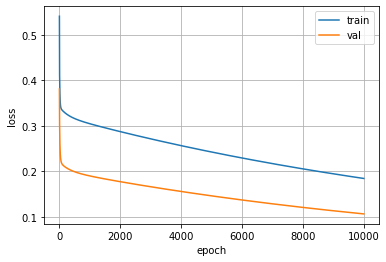

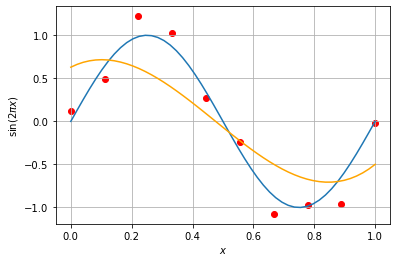

----------Regularizador:0.0001-----------
epoch = 00, train_loss = 9.694e-01, test_loss = 6.432e-01
epoch = 1000, train_loss = 3.061e-01, test_loss = 1.912e-01
epoch = 2000, train_loss = 2.887e-01, test_loss = 1.783e-01
epoch = 3000, train_loss = 2.732e-01, test_loss = 1.674e-01
epoch = 4000, train_loss = 2.587e-01, test_loss = 1.573e-01
epoch = 5000, train_loss = 2.452e-01, test_loss = 1.480e-01
epoch = 6000, train_loss = 2.327e-01, test_loss = 1.394e-01
epoch = 7000, train_loss = 2.210e-01, test_loss = 1.314e-01
epoch = 8000, train_loss = 2.101e-01, test_loss = 1.240e-01
epoch = 9000, train_loss = 2.000e-01, test_loss = 1.171e-01
epoch = 9999, train_loss = 1.906e-01, test_loss = 1.107e-01


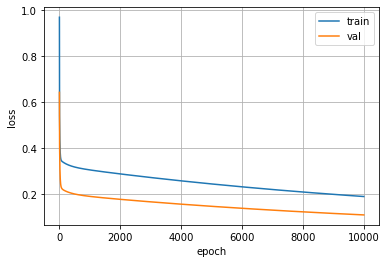

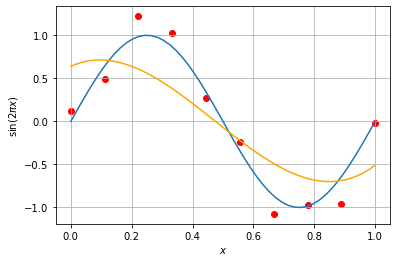

----------Regularizador:0.001-----------
epoch = 00, train_loss = 1.035e+00, test_loss = 7.041e-01
epoch = 1000, train_loss = 3.148e-01, test_loss = 1.979e-01
epoch = 2000, train_loss = 2.978e-01, test_loss = 1.850e-01
epoch = 3000, train_loss = 2.845e-01, test_loss = 1.756e-01
epoch = 4000, train_loss = 2.731e-01, test_loss = 1.676e-01
epoch = 5000, train_loss = 2.633e-01, test_loss = 1.609e-01
epoch = 6000, train_loss = 2.550e-01, test_loss = 1.550e-01
epoch = 7000, train_loss = 2.477e-01, test_loss = 1.500e-01
epoch = 8000, train_loss = 2.415e-01, test_loss = 1.457e-01
epoch = 9000, train_loss = 2.361e-01, test_loss = 1.420e-01
epoch = 9999, train_loss = 2.315e-01, test_loss = 1.388e-01


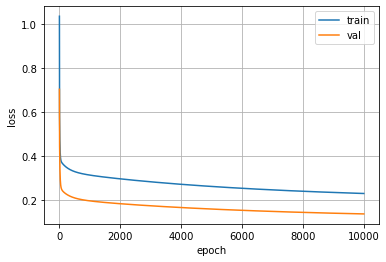

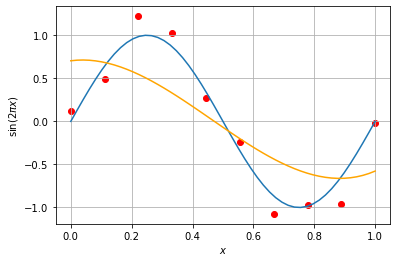

----------Regularizador:0.01-----------
epoch = 00, train_loss = 8.141e-01, test_loss = 6.734e-01
epoch = 1000, train_loss = 3.222e-01, test_loss = 2.056e-01
epoch = 2000, train_loss = 3.156e-01, test_loss = 2.006e-01
epoch = 3000, train_loss = 3.136e-01, test_loss = 1.991e-01
epoch = 4000, train_loss = 3.129e-01, test_loss = 1.986e-01
epoch = 5000, train_loss = 3.126e-01, test_loss = 1.984e-01
epoch = 6000, train_loss = 3.125e-01, test_loss = 1.984e-01
epoch = 7000, train_loss = 3.125e-01, test_loss = 1.984e-01
epoch = 8000, train_loss = 3.125e-01, test_loss = 1.984e-01
epoch = 9000, train_loss = 3.125e-01, test_loss = 1.983e-01
epoch = 9999, train_loss = 3.125e-01, test_loss = 1.983e-01


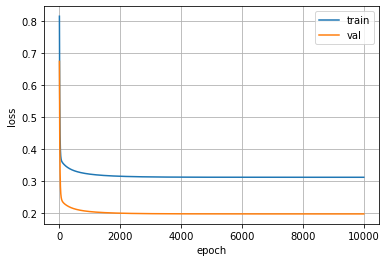

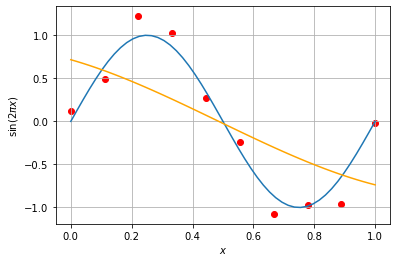

----------Regularizador:0.05-----------
epoch = 00, train_loss = 1.051e+00, test_loss = 6.534e-01
epoch = 1000, train_loss = 3.458e-01, test_loss = 2.305e-01
epoch = 2000, train_loss = 3.458e-01, test_loss = 2.305e-01
epoch = 3000, train_loss = 3.458e-01, test_loss = 2.305e-01
epoch = 4000, train_loss = 3.458e-01, test_loss = 2.305e-01
epoch = 5000, train_loss = 3.458e-01, test_loss = 2.305e-01
epoch = 6000, train_loss = 3.458e-01, test_loss = 2.305e-01
epoch = 7000, train_loss = 3.458e-01, test_loss = 2.305e-01
epoch = 8000, train_loss = 3.458e-01, test_loss = 2.305e-01
epoch = 9000, train_loss = 3.458e-01, test_loss = 2.305e-01
epoch = 9999, train_loss = 3.458e-01, test_loss = 2.305e-01


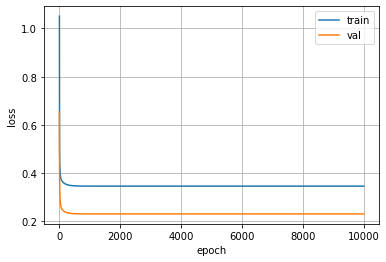

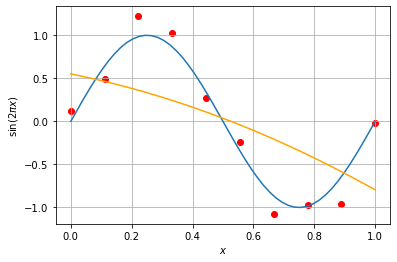

----------Regularizador:0.1-----------
epoch = 00, train_loss = 9.792e-01, test_loss = 7.264e-01
epoch = 1000, train_loss = 3.606e-01, test_loss = 2.478e-01
epoch = 2000, train_loss = 3.606e-01, test_loss = 2.478e-01
epoch = 3000, train_loss = 3.606e-01, test_loss = 2.478e-01
epoch = 4000, train_loss = 3.606e-01, test_loss = 2.478e-01
epoch = 5000, train_loss = 3.606e-01, test_loss = 2.478e-01
epoch = 6000, train_loss = 3.606e-01, test_loss = 2.478e-01
epoch = 7000, train_loss = 3.606e-01, test_loss = 2.478e-01
epoch = 8000, train_loss = 3.606e-01, test_loss = 2.478e-01
epoch = 9000, train_loss = 3.606e-01, test_loss = 2.478e-01
epoch = 9999, train_loss = 3.606e-01, test_loss = 2.478e-01


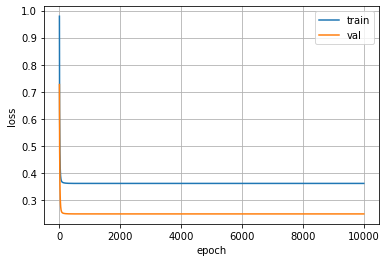

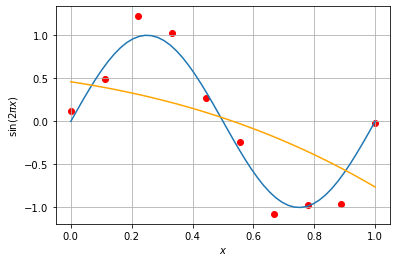

----------Regularizador:0.5-----------
epoch = 00, train_loss = 4.638e-01, test_loss = 3.506e-01
epoch = 1000, train_loss = 4.261e-01, test_loss = 3.225e-01
epoch = 2000, train_loss = 4.261e-01, test_loss = 3.225e-01
epoch = 3000, train_loss = 4.261e-01, test_loss = 3.225e-01
epoch = 4000, train_loss = 4.261e-01, test_loss = 3.225e-01
epoch = 5000, train_loss = 4.261e-01, test_loss = 3.225e-01
epoch = 6000, train_loss = 4.261e-01, test_loss = 3.225e-01
epoch = 7000, train_loss = 4.261e-01, test_loss = 3.225e-01
epoch = 8000, train_loss = 4.261e-01, test_loss = 3.225e-01
epoch = 9000, train_loss = 4.261e-01, test_loss = 3.225e-01
epoch = 9999, train_loss = 4.261e-01, test_loss = 3.225e-01


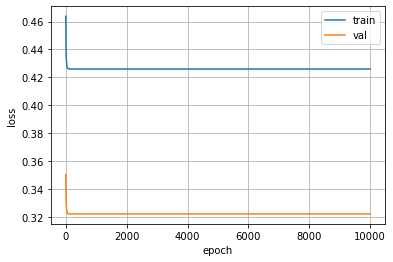

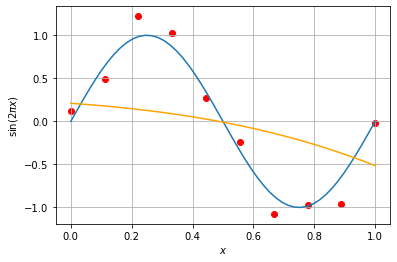

----------Regularizador:1-----------
epoch = 00, train_loss = 6.551e-01, test_loss = 3.928e-01
epoch = 1000, train_loss = 4.701e-01, test_loss = 3.685e-01
epoch = 2000, train_loss = 4.701e-01, test_loss = 3.685e-01
epoch = 3000, train_loss = 4.701e-01, test_loss = 3.685e-01
epoch = 4000, train_loss = 4.701e-01, test_loss = 3.685e-01
epoch = 5000, train_loss = 4.701e-01, test_loss = 3.685e-01
epoch = 6000, train_loss = 4.701e-01, test_loss = 3.685e-01
epoch = 7000, train_loss = 4.701e-01, test_loss = 3.685e-01
epoch = 8000, train_loss = 4.701e-01, test_loss = 3.685e-01
epoch = 9000, train_loss = 4.701e-01, test_loss = 3.685e-01
epoch = 9999, train_loss = 4.701e-01, test_loss = 3.685e-01


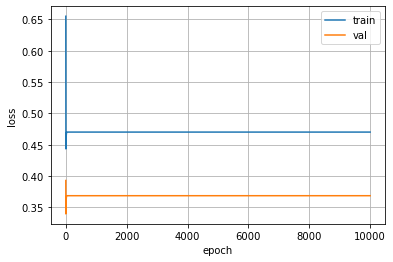

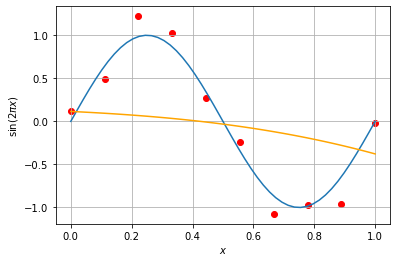

Wall time: 1min 24s


In [8]:
%%time
import collections

# ENTRENAMIENTO
EPOCHS = 10000

x_train_tensor = torch.from_numpy(np.float32(x_train_vec)).to(device)
y_train_tensor = torch.from_numpy(np.float32(y_train_vec)).to(device)
n_train = len(x_train_tensor)

x_test_tensor = torch.from_numpy(np.float32(x_test_vec)).to(device)
y_test_tensor = torch.from_numpy(np.float32(y_test_vec)).to(device)
n_test = len(x_test_tensor)

train_loss = []
test_loss = []

parametro_dict= collections.OrderedDict()

WEIGHT_DECAY = [0,0.0001,0.001,0.01,0.05,0.1,0.5,1]
for regularizador in WEIGHT_DECAY:
    
    train_loss = []
    test_loss = []
    print(f"----------Regularizador:{regularizador}-----------")
    model = LinearRegression(num_features=P)
    model.to(device)
    model.train()
    optimizer = SGD(model.parameters(), lr=LEARNING_RATE, weight_decay=regularizador)
    for epoch in range(EPOCHS):
            
        optimizer.zero_grad()                                # limpia todos los gradientes
        y_pred = model(x_train_tensor)                       # realiza predicción con el modelo (forward pass)
        loss = criterion(y_pred, y_train_tensor) / n_train   # calcula la pérdida (loss) y la divide por # obs
        loss.backward()                                      # calcula los gradientes (backward pass)
        optimizer.step()                                     # realiza paso de optimización, actualizando pesos
        
        train_loss.append(loss.detach().item())
        
        with torch.no_grad():
            y_pred = model(x_test_tensor)
            loss = criterion(y_pred, y_test_tensor) / n_test
            test_loss.append(loss.item())
                    
        if epoch % (EPOCHS//10) == 0 or epoch==(EPOCHS-1):
            print("epoch = {:02d}, train_loss = {:.3e}, test_loss = {:.3e}".format(epoch, train_loss[-1], test_loss[-1]))
    parametro={}
    parametro["train"]=train_loss[-1]
    parametro["test"]=test_loss[-1]
    parametro_dict[f"{regularizador}"]=parametro

    plt.figure()
    plt.plot(np.arange(EPOCHS), train_loss)
    plt.plot(np.arange(EPOCHS), test_loss)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'])
    plt.grid()

    model.eval()
    y_pred = model(x_test_tensor)
    y_pred = y_pred.cpu().detach().numpy().squeeze()

    plt.figure()
    plt.plot(x_val, y_val)
    plt.plot(x_val, y_pred, color='orange')
    plt.scatter(x_train, y_train, color='red')
    plt.ylabel('$\sin(2 \pi x)$')
    plt.xlabel('$x$')
    plt.grid()
    plt.show()

### Gráfico de WD y de sus respectivas pérdidas

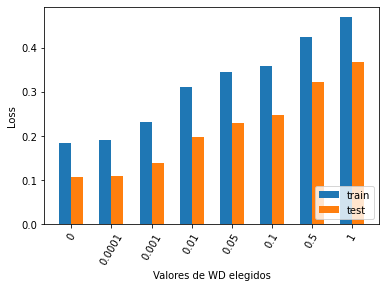

In [9]:
trn_acc = [v['train'] for k, v in parametro_dict.items()]
val_acc = [v['test'] for k, v in parametro_dict.items()]

width =0.3
plt.bar(np.arange(len(trn_acc)), trn_acc, width=width, label='train')
plt.bar(np.arange(len(val_acc))+ width, val_acc, width=width, label='test')
plt.xticks(np.arange(len(val_acc))+ width/2, list(parametro_dict.keys()),
           rotation=60)
plt.ylabel('Loss')
plt.xlabel("Valores de WD elegidos")
plt.legend(loc='lower right')
#plt.ylim(0.7, 1)
plt.savefig('comparacion WD.png', bbox_inches='tight')
plt.show()

### Conclusión: 
En el gráfico de barras podemos ver como cuando el WD cuando es muy pequeño, tanto el train loss como el test loss nos dieron resultados muy favorables, en cambio a medida que el WD fue aumentando, la función de perdida fué incrementando con él.
Otro cosa que podemos análizar es la diferencia/proporción entre la el train loss y el test loss, por ejemplo, en  el valor de WD=0.001 (tercer gráfico de barras), podemos ver que el train loss es casi el doble que el test loss, lo cual no sucede cuando el WD por ejemplo es igual a 1 (último gráfico de barras)
<br>
<br>
<br>
Ahora bien, si vemos los gráficos  del train loss y test loss para cada WD a lo largo de las epochs (es decir, los dos gráficos que se generan con cada búsqueda de WD), podemos ver que, a valores muy pequeños de WD el train loss y test loss disminuyen a lo largo de cada epoch, donde a su vez, podemos observar que los puntos que predice nuestro modelo se ajustan bastante bien a la "ground truth"/verdad, caso contrario, a medida que va aumentando el WD, se empiezan a observar compartamiento raros, como que el train loss, se aplana en ciertos puntos, donde ademas, el modelo, no predice de manera correcta los puntos; en estos casos cuando el WD es muy grande podemos observar que el modelo genera casi una "recta" para predecir los puntos, lo cual no es muy favorable para nuestro dataset, ya que se una función sinusoidal


## Evaluar el uso de función de costo L1.
---

Defino una semilla para experimentar.

In [10]:
torch.manual_seed(666)

In [11]:

model = LinearRegression(num_features=P)

if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')    

model.to(device)



LinearRegression(
  (fc): Linear(in_features=3, out_features=1, bias=True)
)

Lo que voy a hacer en esta parte es solamente cambiar el criterio para que el lugar de ser MSELoss, sea L1Loss, a su vez, voy a experimentar con sus diferentes parámetros como "sum" y "mean"

In [12]:
model.train()  # modelo nuevamente activado para entrenamiento

LEARNING_RATE = 0.1
WEIGHT_DECAY = 0 # L2 regularization coef.

criterion = nn.L1Loss(reduction='mean')

optimizer = SGD(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)


In [13]:
parametro_dict= collections.OrderedDict()

# ENTRENAMIENTO
EPOCHS = 10000

x_train_tensor = torch.from_numpy(np.float32(x_train_vec)).to(device)
y_train_tensor = torch.from_numpy(np.float32(y_train_vec)).to(device)
n_train = len(x_train_tensor)

x_test_tensor = torch.from_numpy(np.float32(x_test_vec)).to(device)
y_test_tensor = torch.from_numpy(np.float32(y_test_vec)).to(device)
n_test = len(x_test_tensor)

train_loss = []
test_loss = []

print(f"----------L1Loss: Parámetro media -----------")

for epoch in range(EPOCHS):
        
    optimizer.zero_grad()                                # limpia todos los gradientes
    y_pred = model(x_train_tensor)                       # realiza predicción con el modelo (forward pass)
    loss = criterion(y_pred, y_train_tensor) / n_train   # calcula la pérdida (loss) y la divide por # obs
    loss.backward()                                      # calcula los gradientes (backward pass)
    optimizer.step()                                     # realiza paso de optimización, actualizando pesos
    
    train_loss.append(loss.detach().item())
    
    with torch.no_grad():
        y_pred = model(x_test_tensor)
        loss = criterion(y_pred, y_test_tensor) / n_test
        test_loss.append(loss.item())
                
    if epoch % (EPOCHS//10) == 0:
        print("epoch = {:02d}, train_loss = {:.3e}, test_loss = {:.3e}".format(epoch, train_loss[-1], test_loss[-1]))

parametro={}
parametro["train"]=train_loss[-1]
parametro["test"]=test_loss[-1]
parametro_dict[f"L1Loss: media"]=parametro

----------L1Loss: Parámetro media -----------
epoch = 00, train_loss = 8.160e-02, test_loss = 1.546e-02
epoch = 1000, train_loss = 4.844e-02, test_loss = 8.666e-03
epoch = 2000, train_loss = 4.784e-02, test_loss = 8.550e-03
epoch = 3000, train_loss = 4.756e-02, test_loss = 8.506e-03
epoch = 4000, train_loss = 4.728e-02, test_loss = 8.462e-03
epoch = 5000, train_loss = 4.703e-02, test_loss = 8.442e-03
epoch = 6000, train_loss = 4.676e-02, test_loss = 8.416e-03
epoch = 7000, train_loss = 4.649e-02, test_loss = 8.389e-03
epoch = 8000, train_loss = 4.622e-02, test_loss = 8.363e-03
epoch = 9000, train_loss = 4.604e-02, test_loss = 8.346e-03


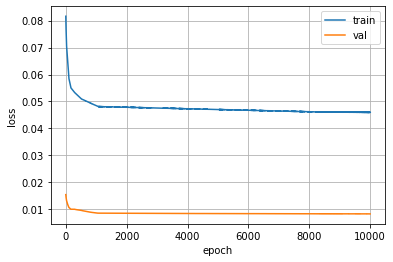

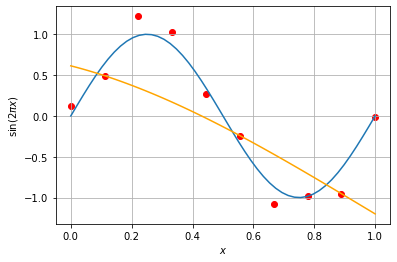

In [14]:
plt.figure()
plt.plot(np.arange(EPOCHS), train_loss)
plt.plot(np.arange(EPOCHS), test_loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.grid()

model.eval()
y_pred = model(x_test_tensor)
y_pred = y_pred.cpu().detach().numpy().squeeze()

plt.figure()
plt.plot(x_val, y_val)
plt.plot(x_val, y_pred, color='orange')
plt.scatter(x_train, y_train, color='red')
plt.ylabel('$\sin(2 \pi x)$')
plt.xlabel('$x$')
plt.grid()
plt.show()

In [15]:

model = LinearRegression(num_features=P)

if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')    

model.to(device)


LinearRegression(
  (fc): Linear(in_features=3, out_features=1, bias=True)
)

In [16]:
model.train()  # modelo nuevamente activado para entrenamiento

LEARNING_RATE = 0.1
WEIGHT_DECAY = 0 # L2 regularization coef.

criterion = nn.L1Loss(reduction='sum')

optimizer = SGD(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

In [17]:
# ENTRENAMIENTO
EPOCHS = 10000

x_train_tensor = torch.from_numpy(np.float32(x_train_vec)).to(device)
y_train_tensor = torch.from_numpy(np.float32(y_train_vec)).to(device)
n_train = len(x_train_tensor)

x_test_tensor = torch.from_numpy(np.float32(x_test_vec)).to(device)
y_test_tensor = torch.from_numpy(np.float32(y_test_vec)).to(device)
n_test = len(x_test_tensor)

train_loss = []
test_loss = []

print(f"----------L1Loss: Parámetro suma -----------")

for epoch in range(EPOCHS):
        
    optimizer.zero_grad()                                # limpia todos los gradientes
    y_pred = model(x_train_tensor)                       # realiza predicción con el modelo (forward pass)
    loss = criterion(y_pred, y_train_tensor) / n_train   # calcula la pérdida (loss) y la divide por # obs
    loss.backward()                                      # calcula los gradientes (backward pass)
    optimizer.step()                                     # realiza paso de optimización, actualizando pesos
    
    train_loss.append(loss.detach().item())
    
    with torch.no_grad():
        y_pred = model(x_test_tensor)
        loss = criterion(y_pred, y_test_tensor) / n_test
        test_loss.append(loss.item())
                
    if epoch % (EPOCHS//10) == 0:
        print("epoch = {:02d}, train_loss = {:.3e}, test_loss = {:.3e}".format(epoch, train_loss[-1], test_loss[-1]))


parametro={}
parametro["train"]=train_loss[-1]
parametro["test"]=test_loss[-1]
parametro_dict[f"L1Loss: suma"]=parametro

----------L1Loss: Parámetro suma -----------
epoch = 00, train_loss = 9.050e-01, test_loss = 7.848e-01
epoch = 1000, train_loss = 4.668e-01, test_loss = 4.096e-01
epoch = 2000, train_loss = 4.473e-01, test_loss = 4.027e-01
epoch = 3000, train_loss = 4.367e-01, test_loss = 3.949e-01
epoch = 4000, train_loss = 4.291e-01, test_loss = 3.796e-01
epoch = 5000, train_loss = 4.244e-01, test_loss = 3.763e-01
epoch = 6000, train_loss = 4.092e-01, test_loss = 3.723e-01
epoch = 7000, train_loss = 4.045e-01, test_loss = 3.579e-01
epoch = 8000, train_loss = 3.912e-01, test_loss = 3.463e-01
epoch = 9000, train_loss = 3.783e-01, test_loss = 3.479e-01


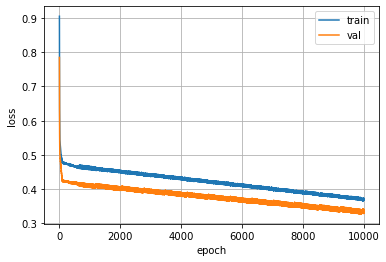

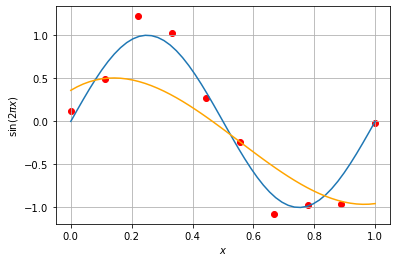

In [18]:
plt.figure()
plt.plot(np.arange(EPOCHS), train_loss)
plt.plot(np.arange(EPOCHS), test_loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.grid()

model.eval()
y_pred = model(x_test_tensor)
y_pred = y_pred.cpu().detach().numpy().squeeze()

plt.figure()
plt.plot(x_val, y_val)
plt.plot(x_val, y_pred, color='orange')
plt.scatter(x_train, y_train, color='red')
plt.ylabel('$\sin(2 \pi x)$')
plt.xlabel('$x$')
plt.grid()
plt.show()

Ejecución del modelo con MSELoss para poder comparar despues en el gráfico de barras

In [19]:

model = LinearRegression(num_features=P)

if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')    

model.to(device)


LinearRegression(
  (fc): Linear(in_features=3, out_features=1, bias=True)
)

In [20]:
model.train()  # modelo nuevamente activado para entrenamiento

LEARNING_RATE = 0.1
WEIGHT_DECAY = 0 # L2 regularization coef.

criterion = nn.MSELoss(reduction='sum')

optimizer = SGD(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

In [21]:
# ENTRENAMIENTO
EPOCHS = 10000

x_train_tensor = torch.from_numpy(np.float32(x_train_vec)).to(device)
y_train_tensor = torch.from_numpy(np.float32(y_train_vec)).to(device)
n_train = len(x_train_tensor)

x_test_tensor = torch.from_numpy(np.float32(x_test_vec)).to(device)
y_test_tensor = torch.from_numpy(np.float32(y_test_vec)).to(device)
n_test = len(x_test_tensor)

train_loss = []
test_loss = []

print(f"----------MSELoss: Parámetro sum (modelo visto en clases) -----------")

for epoch in range(EPOCHS):
        
    optimizer.zero_grad()                                # limpia todos los gradientes
    y_pred = model(x_train_tensor)                       # realiza predicción con el modelo (forward pass)
    loss = criterion(y_pred, y_train_tensor) / n_train   # calcula la pérdida (loss) y la divide por # obs
    loss.backward()                                      # calcula los gradientes (backward pass)
    optimizer.step()                                     # realiza paso de optimización, actualizando pesos
    
    train_loss.append(loss.detach().item())
    
    with torch.no_grad():
        y_pred = model(x_test_tensor)
        loss = criterion(y_pred, y_test_tensor) / n_test
        test_loss.append(loss.item())
                
    if epoch % (EPOCHS//10) == 0:
        print("epoch = {:02d}, train_loss = {:.3e}, test_loss = {:.3e}".format(epoch, train_loss[-1], test_loss[-1]))

parametro={}
parametro["train"]=train_loss[-1]
parametro["test"]=test_loss[-1]
parametro_dict[f"MSELoss: suma"]=parametro

----------MSELoss: Parámetro sum (modelo visto en clases) -----------
epoch = 00, train_loss = 4.495e-01, test_loss = 3.339e-01
epoch = 1000, train_loss = 3.041e-01, test_loss = 1.900e-01
epoch = 2000, train_loss = 2.861e-01, test_loss = 1.765e-01
epoch = 3000, train_loss = 2.703e-01, test_loss = 1.654e-01
epoch = 4000, train_loss = 2.554e-01, test_loss = 1.551e-01
epoch = 5000, train_loss = 2.415e-01, test_loss = 1.454e-01
epoch = 6000, train_loss = 2.284e-01, test_loss = 1.364e-01
epoch = 7000, train_loss = 2.161e-01, test_loss = 1.280e-01
epoch = 8000, train_loss = 2.046e-01, test_loss = 1.202e-01
epoch = 9000, train_loss = 1.938e-01, test_loss = 1.129e-01


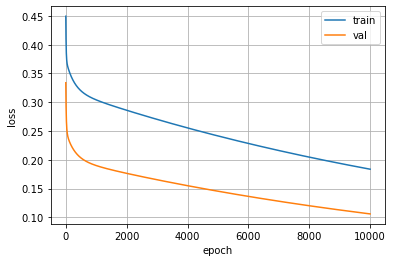

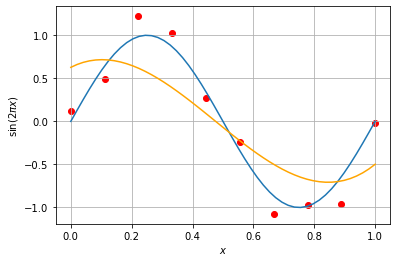

In [22]:
plt.figure()
plt.plot(np.arange(EPOCHS), train_loss)
plt.plot(np.arange(EPOCHS), test_loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.grid()

model.eval()
y_pred = model(x_test_tensor)
y_pred = y_pred.cpu().detach().numpy().squeeze()

plt.figure()
plt.plot(x_val, y_val)
plt.plot(x_val, y_pred, color='orange')
plt.scatter(x_train, y_train, color='red')
plt.ylabel('$\sin(2 \pi x)$')
plt.xlabel('$x$')
plt.grid()
plt.show()

### Gráfico de L1 y de sus respectivas pérdidas

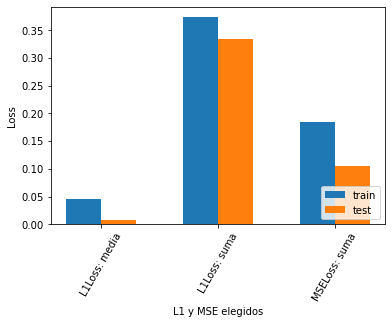

In [23]:
trn_acc = [v['train'] for k, v in parametro_dict.items()]
val_acc = [v['test'] for k, v in parametro_dict.items()]

width =0.3
plt.bar(np.arange(len(trn_acc)), trn_acc, width=width, label='train')
plt.bar(np.arange(len(val_acc))+ width, val_acc, width=width, label='test')
plt.xticks(np.arange(len(val_acc))+ width/2, list(parametro_dict.keys()),
           rotation=60)
plt.ylabel('Loss')
plt.xlabel("L1 y MSE elegidos")
plt.legend(loc='lower right')
#plt.ylim(0.7, 1)
plt.savefig('comparacion L1.png', bbox_inches='tight')
plt.show()

### Conclusión:
En el gráfico de barras podemos observar que la función de loss es la más baja cuando L1Loss es media, pero, si vemos el gráfico cuando el modelo predice los resultados para x_val, veremos que la función resultante es una linea recta, por lo que nuestro modelo estaría teniendo una mala presición/accuracy, no así para el caso de L1Loss con parámetro suma, donde dio resultados que se podrían considerar satisfactorios, pero comparado con MSEloss Suma, que fué el modelo base visto en clases, este último apriori parece tener mejores resultados, ya que su curva predicha se asemeja mejor a la función sinusoidal.
<br>
<br>
Lo visto hasta ahora, me hace pensar que comparar los train loss y test loss de cada modelo, no es un indicador definitivo, para definir, cual es mejor ni cual es peor.

Tambien es importante notar que, si ejecutamos nuevamente el notebook, podemos obtener resultados diferentes.


## GridSearch
---

Ahora voy a realizar una búsqueda en grilla de las Epochs, Weight Decay y Learning Rate, donde la función de pérdida sera MSEloss con parámetro Sum, que es el modelo base visto en clases

In [24]:
model = LinearRegression(num_features=P)
# si tenemos GPU, llevamos el modelo ahí
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')    
model.to(device)

LinearRegression(
  (fc): Linear(in_features=3, out_features=1, bias=True)
)

In [25]:
model.train()  # modelo nuevamente activado para entrenamiento
#LEARNING_RATE = 0.1
#WEIGHT_DECAY = 0 # L2 regularization coef.
criterion = nn.MSELoss(reduction='sum')
#optimizer = SGD(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)


In [26]:
# ENTRENAMIENTO
parametro_dict= collections.OrderedDict()

EPOCHS = 10000

x_train_tensor = torch.from_numpy(np.float32(x_train_vec)).to(device)
y_train_tensor = torch.from_numpy(np.float32(y_train_vec)).to(device)
n_train = len(x_train_tensor)

x_test_tensor = torch.from_numpy(np.float32(x_test_vec)).to(device)
y_test_tensor = torch.from_numpy(np.float32(y_test_vec)).to(device)
n_test = len(x_test_tensor)


In [27]:
%%time
menor = np.inf
best_hyper_dict = {}
LEARNING_RATE = [0,0.001,0.01,0.1]
WEIGHT_DECAY = [0,0.001,0.01,0.1]
EPOCHS = [10000,5000] 
for LR in LEARNING_RATE:                       # ciclo para ir variando los valores de LEARNING_RATE
    for WD in WEIGHT_DECAY :                   # ciclo para ir variando los valores de WEIGHT_DECAY
        for EP in EPOCHS:
            print("LEARNING_RATE: ", LR)
            print("WEIGHT_DECAY: ", WD)
            print("EPOCHS: ", EP)
            model = LinearRegression(num_features=P)
            model.to(device)
            model.train()
            optimizer = SGD(model.parameters(), lr=LR, weight_decay=WD)
            criterion = nn.MSELoss(reduction='sum')

            x_train_tensor = torch.from_numpy(np.float32(x_train_vec)).to(device)
            y_train_tensor = torch.from_numpy(np.float32(y_train_vec)).to(device)
            n_train = len(x_train_tensor)

            x_test_tensor = torch.from_numpy(np.float32(x_test_vec)).to(device)
            y_test_tensor = torch.from_numpy(np.float32(y_test_vec)).to(device)
            n_test = len(x_test_tensor)
            
            train_loss = []
            test_loss = []

            EPOCA = EP
            for epoch in range(EPOCA):
        
                optimizer.zero_grad()                                # limpia todos los gradientes
                y_pred = model(x_train_tensor)                       # realiza predicción con el modelo (forward pass)
                loss = criterion(y_pred, y_train_tensor) / n_train   # calcula la pérdida (loss) y la divide por # obs
                loss.backward()                                      # calcula los gradientes (backward pass)
                optimizer.step()                                     # realiza paso de optimización, actualizando pesos
                
                train_loss.append(loss.detach().item())
                
                with torch.no_grad():
                    y_pred = model(x_test_tensor)
                    loss = criterion(y_pred, y_test_tensor) / n_test
                    test_loss.append(loss.item())
                #La comparación la realizo acá, comparando la funcion de perdida en base a las predicciones
                if loss.item() < menor:
                    menor = loss.item()
                    best_hyper_dict = {'LEARNING_RATE': LR, 'WEIGHT_DECAY' : WD, 'EPOCHS' : EP} 

                if epoch % (EP//10) == 0:
                    print("epoch = {:02d}, train_loss = {:.3e}, test_loss = {:.3e}".format(epoch, train_loss[-1]                , test_loss[-1]))

            parametro={}
            parametro["train"]=train_loss[-1]
            parametro["test"]=test_loss[-1]
            parametro_dict[f"EP:{EPOCA}\n WD:{WD}\n LR:{LR}"]=parametro

LEARNING_RATE:  0
WEIGHT_DECAY:  0
EPOCHS:  10000
epoch = 00, train_loss = 5.442e-01, test_loss = 4.395e-01
epoch = 1000, train_loss = 5.442e-01, test_loss = 4.395e-01
epoch = 2000, train_loss = 5.442e-01, test_loss = 4.395e-01
epoch = 3000, train_loss = 5.442e-01, test_loss = 4.395e-01
epoch = 4000, train_loss = 5.442e-01, test_loss = 4.395e-01
epoch = 5000, train_loss = 5.442e-01, test_loss = 4.395e-01
epoch = 6000, train_loss = 5.442e-01, test_loss = 4.395e-01
epoch = 7000, train_loss = 5.442e-01, test_loss = 4.395e-01
epoch = 8000, train_loss = 5.442e-01, test_loss = 4.395e-01
epoch = 9000, train_loss = 5.442e-01, test_loss = 4.395e-01
LEARNING_RATE:  0
WEIGHT_DECAY:  0
EPOCHS:  5000
epoch = 00, train_loss = 5.653e-01, test_loss = 4.556e-01
epoch = 500, train_loss = 5.653e-01, test_loss = 4.556e-01
epoch = 1000, train_loss = 5.653e-01, test_loss = 4.556e-01
epoch = 1500, train_loss = 5.653e-01, test_loss = 4.556e-01
epoch = 2000, train_loss = 5.653e-01, test_loss = 4.556e-01
epoch 

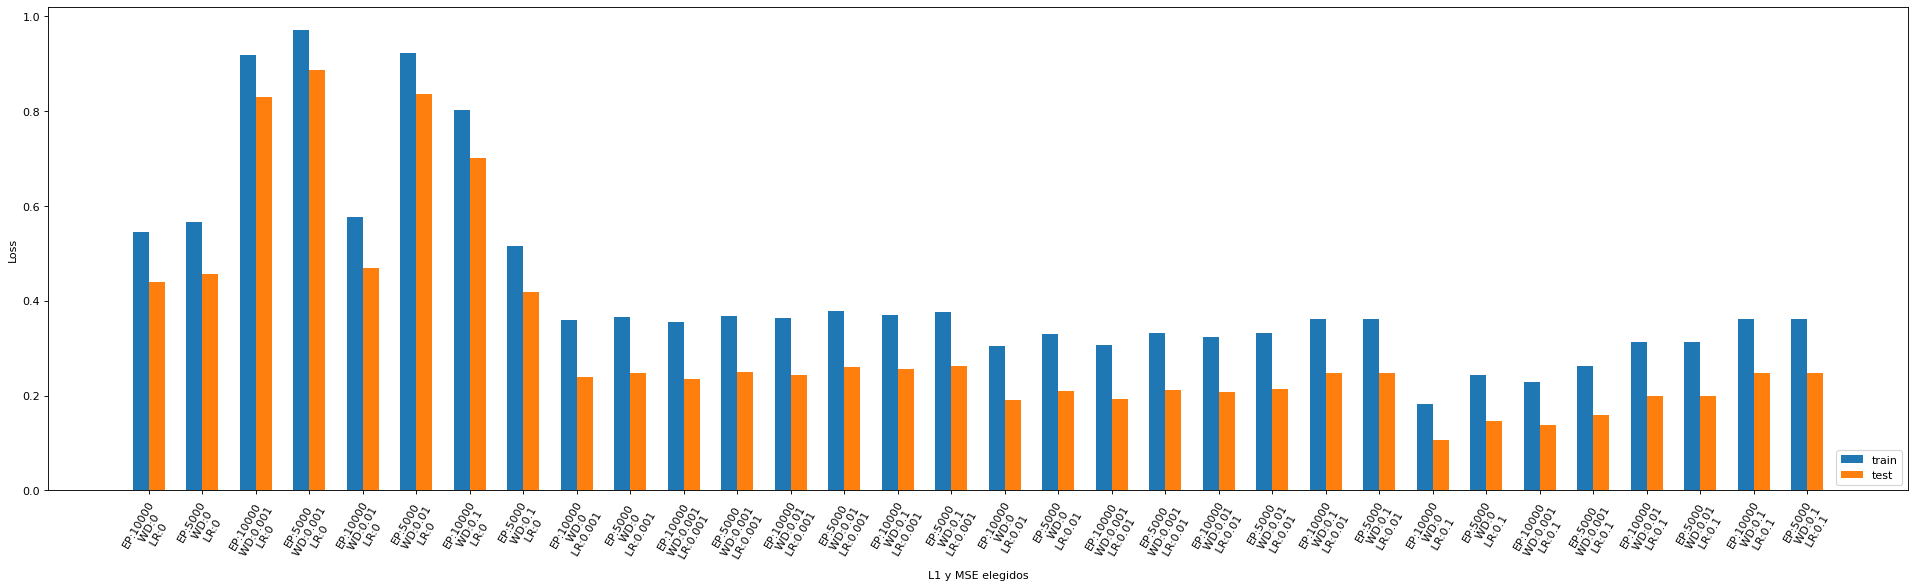

In [28]:
trn_acc = [v['train'] for k, v in parametro_dict.items()]
val_acc = [v['test'] for k, v in parametro_dict.items()]

width =0.3
plt.figure(figsize=(30, 8), dpi=80)
plt.bar(np.arange(len(trn_acc)), trn_acc, width=width, label='train')
plt.bar(np.arange(len(val_acc))+ width, val_acc, width=width, label='test')
plt.xticks(np.arange(len(val_acc))+ width/2, list(parametro_dict.keys()),
           rotation=60)
plt.ylabel('Loss')
plt.xlabel("L1 y MSE elegidos")
plt.legend(loc='lower right')
#plt.ylim(0.7, 1)
plt.savefig('Búsqueda en grilla.png', bbox_inches='tight')
plt.show()

Viendo el gráfico de barras podemos ver que, muchas de las combinaciones posibles de la búsqueda en grilla dieron resultados similares. Donde podemos observar que:
- El learning rate = 0 : fueron los casos en donde mayor pérdida hubo
- No pareceria haber diferencia significativa entre la cantidad de épocas (Esto no será así para el punto 7, ya que usamos una dataset más "real"), creo que esto es debido a la pequeñez del dataset


Los mejores parámetros son los siguientes


In [29]:
print ("Los mejores hiper-parámetros son: ", best_hyper_dict)

Los mejores hiper-parámetros son:  {'LEARNING_RATE': 0.1, 'WEIGHT_DECAY': 0, 'EPOCHS': 10000}


Ahora voy a proceder a entrenar el modelo final,en base a los mejores parámetros que obtuve

In [30]:
model = LinearRegression(num_features=P)
# si tenemos GPU, llevamos el modelo ahí
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')    
model.to(device)

LinearRegression(
  (fc): Linear(in_features=3, out_features=1, bias=True)
)

In [31]:
model.train()  # modelo nuevamente activado para entrenamiento

LEARNING_RATE = best_hyper_dict['LEARNING_RATE']
WEIGHT_DECAY = best_hyper_dict['WEIGHT_DECAY'] # L2 regularization coef.

print("LEARNING_RATE: ", LEARNING_RATE)
print("WEIGHT_DECAY: ", WEIGHT_DECAY)

criterion = nn.MSELoss(reduction='sum')

optimizer = SGD(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

LEARNING_RATE:  0.1
WEIGHT_DECAY:  0


In [32]:

EPOCHS = best_hyper_dict['EPOCHS']


x_train_tensor = torch.from_numpy(np.float32(x_train_vec)).to(device)
y_train_tensor = torch.from_numpy(np.float32(y_train_vec)).to(device)
n_train = len(x_train_tensor)

x_test_tensor = torch.from_numpy(np.float32(x_test_vec)).to(device)
y_test_tensor = torch.from_numpy(np.float32(y_test_vec)).to(device)
n_test = len(x_test_tensor)

train_loss = []
test_loss = []

for epoch in range(EPOCHS):
        
    optimizer.zero_grad()                                # limpia todos los gradientes
    y_pred = model(x_train_tensor)                       # realiza predicción con el modelo (forward pass)
    loss = criterion(y_pred, y_train_tensor) / n_train   # calcula la pérdida (loss) y la divide por # obs
    loss.backward()                                      # calcula los gradientes (backward pass)
    optimizer.step()                                     # realiza paso de optimización, actualizando pesos
    
    train_loss.append(loss.detach().item())
    
    with torch.no_grad():
        y_pred = model(x_test_tensor)
        loss = criterion(y_pred, y_test_tensor) / n_test
        test_loss.append(loss.item())
                
    if epoch % (EPOCHS//10) == 0:
        print("epoch = {:02d}, train_loss = {:.3e}, test_loss = {:.3e}".format(epoch, train_loss[-1], test_loss[-1]))

epoch = 00, train_loss = 1.208e+00, test_loss = 7.068e-01
epoch = 1000, train_loss = 3.141e-01, test_loss = 1.969e-01
epoch = 2000, train_loss = 2.956e-01, test_loss = 1.832e-01
epoch = 3000, train_loss = 2.792e-01, test_loss = 1.716e-01
epoch = 4000, train_loss = 2.638e-01, test_loss = 1.609e-01
epoch = 5000, train_loss = 2.494e-01, test_loss = 1.509e-01
epoch = 6000, train_loss = 2.358e-01, test_loss = 1.415e-01
epoch = 7000, train_loss = 2.231e-01, test_loss = 1.328e-01
epoch = 8000, train_loss = 2.112e-01, test_loss = 1.246e-01
epoch = 9000, train_loss = 2.000e-01, test_loss = 1.170e-01


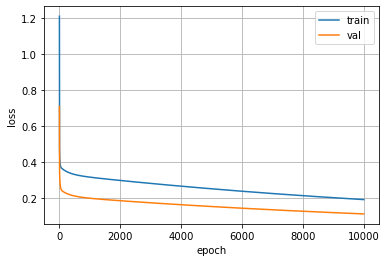

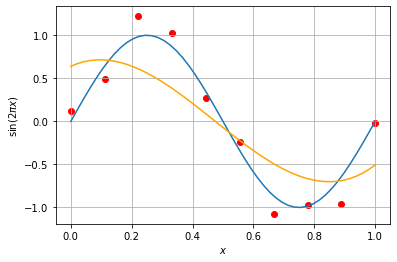

In [33]:
plt.figure()
plt.plot(np.arange(EPOCHS), train_loss)
plt.plot(np.arange(EPOCHS), test_loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.grid()

model.eval()
y_pred = model(x_test_tensor)
y_pred = y_pred.cpu().detach().numpy().squeeze()

plt.figure()
plt.plot(x_val, y_val)
plt.plot(x_val, y_pred, color='orange')
plt.scatter(x_train, y_train, color='red')
plt.ylabel('$\sin(2 \pi x)$')
plt.xlabel('$x$')
plt.grid()
plt.show()

### Conclusión: 
El mejor modelo con los parámetros no dio buenos resultados, si bien no está mal, creo que podría haber sido mejor, ademas de que la búsqueda en sí resulto ser muy costosa computacionalmente, si comparamos con el modelo del Ejemplo 1 visto en clases, el modelo resultante, fue básicamente el mismo, pero tampoco esto es malo. 
<br>
También recalco que, cuando estuve probando la búsqueda en grilla, debido a como aprende el modelo y a la aleatoriedad del mismo, a veces, obtuve mejores resultados en comparación con el modelo visto en clases.

## 2. Implementar y entrenar un modelo de red feedforward de dos capas como la segunda de la figura. Experimentar con distintos números de nodos en la capa oculta. Repetir la búsqueda de tasa de aprendizaje (learning rate) del punto anterior.<a name="activity2"></a>
---

### Implementar y entrenar un modelo de red feedforward de dos capas como la segunda de la figura.
A continuación voy a implementar un modelo de 2 capas

In [34]:
class FeedforwardNet(nn.Module):
    def __init__(self, num_features, num_hidden, output):
        super(FeedforwardNet, self).__init__()
        # completa con tu código aquí
        # Aquí definimos las capas, en este caso tenemos
        # una activacion lineal seguido de un RELU, para luego tener otra
        # Linear, que va a dar las salidas.
        self.fc1 = torch.nn.Linear(num_features, num_hidden, bias=True)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(num_hidden, output, bias=True)
        
    def forward(self, x):
        # completa con tu código aquí
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [35]:
model = FeedforwardNet(num_features=P, num_hidden = 2, output = 1)
# si tenemos GPU, llevamos el modelo ahí
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')    
model.to(device)   



FeedforwardNet(
  (fc1): Linear(in_features=3, out_features=2, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=2, out_features=1, bias=True)
)

** Defino una función para mostrar los parámetros de la red neuronal **

In [36]:
from prettytable import PrettyTable

def count_parameters(model):
    table = PrettyTable(["Modulos", "Parámetros"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        table.add_row([name, param])
        total_params+=param
    print(table)
    print(f"Total Parametros entrenables: {total_params}")
    return total_params
    
count_parameters(model)

+------------+------------+
|  Modulos   | Parámetros |
+------------+------------+
| fc1.weight |     6      |
|  fc1.bias  |     2      |
| fc2.weight |     2      |
|  fc2.bias  |     1      |
+------------+------------+
Total Parametros entrenables: 11


11

### ** ¿Cómo interpretar la tabla? **
En esta tabla podemos ver nuestra red neuronal:
Los números de los parámetros son los siguientes:

- fc1.Weight = 3 entradas y tenemos 2 neuronas en la la primera capa, entonces es 3*2=6
- fc1.bias =  tenemos 2 neuronas en la primera capa, entonces 2 bias
- fc2.Weight =  tenemos la neurona de la salida que recibe dos entradas , entonces 2 weights
- fc2.bias = la ultima neurona, que es única, tiene 1 bias por lo tanto

Total: 11 parámetros.

Este procedimiento es análogo para todas las redes neuronales siguientes


Tambien es posible definir el modelo anterior de esta manera.
<br> Pero me voy a abstener a usar la forma vista en clases.

In [37]:
model2 = nn.Sequential(
            nn.Linear(P, 2),
            nn.Tanh(),
            nn.Linear(2, 1))

def count_parameters(model):
    table = PrettyTable(["Modulos", "Parámetros"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        table.add_row([name, param])
        total_params+=param
    print(table)
    print(f"Total Parametros entrenables: {total_params}")
    return total_params
    
count_parameters(model2)

+----------+------------+
| Modulos  | Parámetros |
+----------+------------+
| 0.weight |     6      |
|  0.bias  |     2      |
| 2.weight |     2      |
|  2.bias  |     1      |
+----------+------------+
Total Parametros entrenables: 11


11

### Experimentar con distintos números de nodos en la capa oculta.

Primero voy a experimentar con distintos numeros de Hidden layer (Parámetros "num_hidden" en la definicion de la red neuronal), usando los valores siguientes estables para comparación.
- LEARNING_RATE =  0.1
- WEIGHT_DECAY =   0.0001 



In [38]:
#reinicio mi variable para hacer los gráficos de Loss
parametro_dict= collections.OrderedDict()


In [39]:
model.train()  # modelo nuevamente activado para entrenamiento
LEARNING_RATE =  0.1

WEIGHT_DECAY =   0.0001 # L2 coeficiente de regularización 

#    criterion = nn.L1Loss(reduction='sum') # función de costo L1
criterion = nn.MSELoss(reduction='sum') # función de costo L1 

optimizer = SGD(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

In [40]:
x_train_tensor = torch.from_numpy(np.float32(x_train_vec)).to(device)
y_train_tensor = torch.from_numpy(np.float32(y_train_vec)).to(device)
n_train = len(x_train_tensor)

x_test_tensor = torch.from_numpy(np.float32(x_test_vec)).to(device)
y_test_tensor = torch.from_numpy(np.float32(y_test_vec)).to(device)
n_test = len(x_test_tensor)

train_loss = []
test_loss = []
EPOCHS=10000
for epoch in range(EPOCHS):

    optimizer.zero_grad()                                # limpia todos los gradientes
    y_pred = model(x_train_tensor)                       # realiza predicción con el modelo (forward pass)
    loss = criterion(y_pred, y_train_tensor) / n_train   # calcula la pérdida (loss) y la divide por # obs
    loss.backward()                                      # calcula los gradientes (backward pass)
    optimizer.step()                                     # realiza paso de optimización, actualizando pesos

    train_loss.append(loss.detach().item())

    with torch.no_grad():
        y_pred = model(x_test_tensor)
        loss = criterion(y_pred, y_test_tensor) / n_test
        test_loss.append(loss.item())

    if epoch % (EPOCHS//10) == 0:
        print("epoch = {:02d}, train_loss = {:.3e}, test_loss = {:.3e}".format(epoch, train_loss[-1], test_loss[-1]))

parametro={}
parametro["train"]=train_loss[-1]
parametro["test"]=test_loss[-1]
parametro_dict[f"num_hidden:{2}"]=parametro

epoch = 00, train_loss = 6.009e-01, test_loss = 4.956e-01
epoch = 1000, train_loss = 9.440e-02, test_loss = 4.785e-02
epoch = 2000, train_loss = 1.449e-02, test_loss = 1.052e-02
epoch = 3000, train_loss = 1.351e-02, test_loss = 1.708e-02
epoch = 4000, train_loss = 1.463e-02, test_loss = 2.133e-02
epoch = 5000, train_loss = 1.411e-02, test_loss = 2.070e-02
epoch = 6000, train_loss = 1.373e-02, test_loss = 2.000e-02
epoch = 7000, train_loss = 1.355e-02, test_loss = 1.964e-02
epoch = 8000, train_loss = 1.348e-02, test_loss = 1.954e-02
epoch = 9000, train_loss = 1.349e-02, test_loss = 1.948e-02


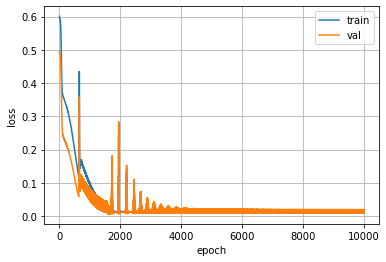

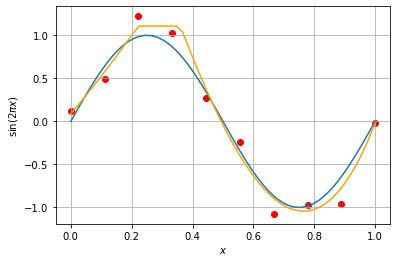

In [41]:
plt.figure()
plt.plot(np.arange(EPOCHS), train_loss)
plt.plot(np.arange(EPOCHS),test_loss )
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.grid()

model.eval()
y_pred = model(x_test_tensor)
y_pred = y_pred.cpu().detach().numpy().squeeze()

plt.figure()
plt.plot(x_val, y_val)
plt.plot(x_val, y_pred, color='orange')
plt.scatter(x_train, y_train, color='red')
plt.ylabel('$\sin(2 \pi x)$')
plt.xlabel('$x$')
plt.grid()
plt.show()

Ahora probamos con num_hidden = 100

In [42]:
model = FeedforwardNet(num_features=P, num_hidden = 100, output = 1)
# si tenemos GPU, llevamos el modelo ahí
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')    
model.to(device)   


def count_parameters(model):
    table = PrettyTable(["Modulos", "Parámetros"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        table.add_row([name, param])
        total_params+=param
    print(table)
    print(f"Total Parametros entrenables: {total_params}")
    return total_params
    
count_parameters(model)

+------------+------------+
|  Modulos   | Parámetros |
+------------+------------+
| fc1.weight |    300     |
|  fc1.bias  |    100     |
| fc2.weight |    100     |
|  fc2.bias  |     1      |
+------------+------------+
Total Parametros entrenables: 501


501

Pasamos de 11 parámetros a 501, veamos como se comporta nuestro modelo...

In [43]:
model.train()  # modelo nuevamente activado para entrenamiento
LEARNING_RATE =  0.1

WEIGHT_DECAY =   0.0001 # L2 coeficiente de regularización 

#    criterion = nn.L1Loss(reduction='sum') # función de costo L1
criterion = nn.MSELoss(reduction='sum') # función de costo L1 

optimizer = SGD(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

In [44]:
x_train_tensor = torch.from_numpy(np.float32(x_train_vec)).to(device)
y_train_tensor = torch.from_numpy(np.float32(y_train_vec)).to(device)
n_train = len(x_train_tensor)

x_test_tensor = torch.from_numpy(np.float32(x_test_vec)).to(device)
y_test_tensor = torch.from_numpy(np.float32(y_test_vec)).to(device)
n_test = len(x_test_tensor)

train_loss = []
test_loss = []
EPOCHS=10000

for epoch in range(EPOCHS):

    optimizer.zero_grad()                                # limpia todos los gradientes
    y_pred = model(x_train_tensor)                       # realiza predicción con el modelo (forward pass)
    loss = criterion(y_pred, y_train_tensor) / n_train   # calcula la pérdida (loss) y la divide por # obs
    loss.backward()                                      # calcula los gradientes (backward pass)
    optimizer.step()                                     # realiza paso de optimización, actualizando pesos

    train_loss.append(loss.detach().item())

    with torch.no_grad():
        y_pred = model(x_test_tensor)
        loss = criterion(y_pred, y_test_tensor) / n_test
        test_loss.append(loss.item())

    if epoch % (EPOCHS//10) == 0:
        print("epoch = {:02d}, train_loss = {:.3e}, test_loss = {:.3e}".format(epoch, train_loss[-1], test_loss[-1]))

parametro={}
parametro["train"]=train_loss[-1]
parametro["test"]=test_loss[-1]
parametro_dict[f"num_hidden:{100}"]=parametro

epoch = 00, train_loss = 5.737e-01, test_loss = 4.284e-01
epoch = 1000, train_loss = 1.705e-02, test_loss = 9.788e-03
epoch = 2000, train_loss = 1.322e-02, test_loss = 9.624e-03
epoch = 3000, train_loss = 1.066e-02, test_loss = 9.661e-03
epoch = 4000, train_loss = 8.696e-03, test_loss = 1.037e-02
epoch = 5000, train_loss = 7.337e-03, test_loss = 1.084e-02
epoch = 6000, train_loss = 6.586e-03, test_loss = 1.106e-02
epoch = 7000, train_loss = 6.127e-03, test_loss = 1.102e-02
epoch = 8000, train_loss = 5.986e-03, test_loss = 1.109e-02
epoch = 9000, train_loss = 5.651e-03, test_loss = 1.111e-02


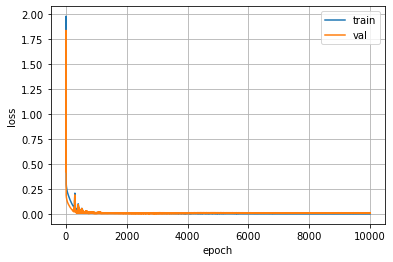

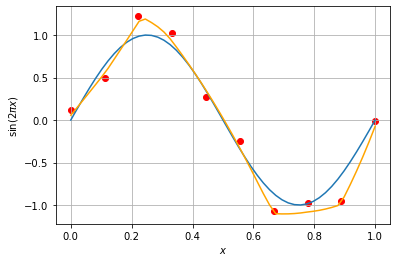

In [45]:
plt.figure()
plt.plot(np.arange(EPOCHS), train_loss)
plt.plot(np.arange(EPOCHS), test_loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.grid()

model.eval()
y_pred = model(x_test_tensor)
y_pred = y_pred.cpu().detach().numpy().squeeze()

plt.figure()
plt.plot(x_val, y_val)
plt.plot(x_val, y_pred, color='orange')
plt.scatter(x_train, y_train, color='red')
plt.ylabel('$\sin(2 \pi x)$')
plt.xlabel('$x$')
plt.grid()
plt.show()

### Gráfico comparando el parámetros num_hidden de 2 a 100

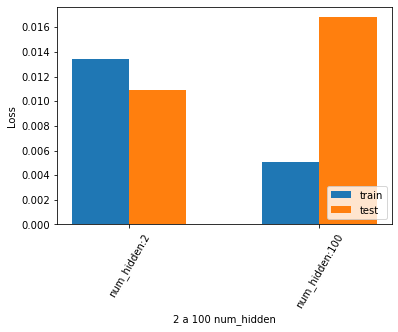

In [46]:
trn_acc = [v['train'] for k, v in parametro_dict.items()]
val_acc = [v['test'] for k, v in parametro_dict.items()]

width =0.3
#plt.figure(figsize=(30, 8), dpi=80)
plt.bar(np.arange(len(trn_acc)), trn_acc, width=width, label='train')
plt.bar(np.arange(len(val_acc))+ width, val_acc, width=width, label='test')
plt.xticks(np.arange(len(val_acc))+ width/2, list(parametro_dict.keys()),
           rotation=60)
plt.ylabel('Loss')
plt.xlabel("2 a 100 num_hidden")
plt.legend(loc='lower right')
#plt.ylim(0.7, 1)
plt.savefig('num_hidden 2 a 100.png', bbox_inches='tight')
plt.show()

### Conclusión:
El paso de num_hidden de 2 a 100 a primera vista pareceria que nuestro modelo con 100 neuronas en la capa oculta es mejor, pero si observamos detenidamente el gráfico, veremos que el modelo de 100, como que trata de seguir los puntos de Test, por lo que parecería ser que estamos en "overfitting", esto tiene sentido, ya que al tener mas parámetros el modelo puede representar funciones más complejas, lo que hay que tener cuidado debido al overfitting.
<br>
También en el gráfico podemos observar que cuando elegimos 2 neuronas como "num_hidden", nuestra curva resultante es más "suave/lisa", en comparación con la de 100.
<br>
<br>
Pero a pesar del overfitting, nuestro modelo de solo 2 neuronas, obtuvo execelentes resultados, a pesar de tener menos parámetros e incluso mejores resultados que el primero modelo sin capas ocultas. Lo que nos permite concluir que al aumentar en solo una capa oculta nuestro modelo, con pocos parámetros, mejoramos significativamente nuestras predicciones.
<br>

Lo del overfitting se puede ver claramente en el gráfico de barras, viendo el modelo con 100 neuronas, que tiene un increiblemente menor Loss Train, comparado con el Test Loss, no así para el caso de "num_hidden"=2.

### Repetir la búsqueda de tasa de aprendizaje (learning rate) del punto anterior. 
Ahora vamos a usar como base el modelo de dos capas, pero con num_hidden=2, para ver como el learning_rate afecta a este modelo

In [47]:
parametro_dict= collections.OrderedDict()

In [48]:
model = FeedforwardNet(num_features=P, num_hidden = 2, output = 1)
# si tenemos GPU, llevamos el modelo ahí
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')    
model.to(device)   


FeedforwardNet(
  (fc1): Linear(in_features=3, out_features=2, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=2, out_features=1, bias=True)
)

In [49]:
model.train()  # modelo nuevamente activado para entrenamiento

WEIGHT_DECAY =   0.0001 # L2 coeficiente de regularización 

#    criterion = nn.L1Loss(reduction='sum') # función de costo L1
criterion = nn.MSELoss(reduction='sum') # función de costo L1 



In [50]:
%%time
from tqdm import tqdm
x_train_tensor = torch.from_numpy(np.float32(x_train_vec)).to(device)
y_train_tensor = torch.from_numpy(np.float32(y_train_vec)).to(device)
n_train = len(x_train_tensor)

x_test_tensor = torch.from_numpy(np.float32(x_test_vec)).to(device)
y_test_tensor = torch.from_numpy(np.float32(y_test_vec)).to(device)
n_test = len(x_test_tensor)

train_loss = []
test_loss = []
EPOCHS=10000

menor = np.inf
best_hyper_dict = {}
LEARNING_RATE =  [0,0.1,0.01,0.001]
for LR in tqdm(LEARNING_RATE):
    print(f"\n--------Learning Rate: {LR}--------")
    model = FeedforwardNet(num_features=P, num_hidden = 2, output = 1)
    model.to(device)
    model.train()
    optimizer = SGD(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
    for epoch in range(EPOCHS):

        optimizer.zero_grad()                                # limpia todos los gradientes
        y_pred = model(x_train_tensor)                       # realiza predicción con el modelo (forward pass)
        loss = criterion(y_pred, y_train_tensor) / n_train   # calcula la pérdida (loss) y la divide por # obs
        loss.backward()                                      # calcula los gradientes (backward pass)
        optimizer.step()                                     # realiza paso de optimización, actualizando pesos

        train_loss.append(loss.detach().item())

        with torch.no_grad():
            y_pred = model(x_test_tensor)
            loss = criterion(y_pred, y_test_tensor) / n_test
            test_loss.append(loss.item())

        if loss.item() < menor:
            menor = loss.item()
            best_hyper_dict = {'LEARNING_RATE': LR} 

        if epoch % (EPOCHS//10) == 0:
            print("epoch = {:02d}, train_loss = {:.3e}, test_loss = {:.3e}".format(epoch, train_loss[-1], test_loss[-1]))
    parametro={}
    parametro["train"]=train_loss[-1]
    parametro["test"]=test_loss[-1]
    parametro_dict[f"LR:{LR}"]=parametro

  0%|          | 0/4 [00:00<?, ?it/s]


--------Learning Rate: 0--------
epoch = 00, train_loss = 7.563e-01, test_loss = 6.631e-01
epoch = 1000, train_loss = 7.563e-01, test_loss = 6.631e-01
epoch = 2000, train_loss = 7.563e-01, test_loss = 6.631e-01
epoch = 3000, train_loss = 7.563e-01, test_loss = 6.631e-01
epoch = 4000, train_loss = 7.563e-01, test_loss = 6.631e-01
epoch = 5000, train_loss = 7.563e-01, test_loss = 6.631e-01
epoch = 6000, train_loss = 7.563e-01, test_loss = 6.631e-01
epoch = 7000, train_loss = 7.563e-01, test_loss = 6.631e-01
epoch = 8000, train_loss = 7.563e-01, test_loss = 6.631e-01
epoch = 9000, train_loss = 7.563e-01, test_loss = 6.631e-01


 25%|██▌       | 1/4 [00:12<00:38, 12.80s/it]


--------Learning Rate: 0.1--------
epoch = 00, train_loss = 8.110e-01, test_loss = 6.171e-01
epoch = 1000, train_loss = 1.050e-01, test_loss = 4.800e-02
epoch = 2000, train_loss = 9.267e-02, test_loss = 4.315e-02
epoch = 3000, train_loss = 9.255e-02, test_loss = 4.321e-02
epoch = 4000, train_loss = 9.247e-02, test_loss = 4.314e-02
epoch = 5000, train_loss = 9.239e-02, test_loss = 4.307e-02
epoch = 6000, train_loss = 9.232e-02, test_loss = 4.300e-02
epoch = 7000, train_loss = 9.226e-02, test_loss = 4.293e-02
epoch = 8000, train_loss = 9.219e-02, test_loss = 4.287e-02
epoch = 9000, train_loss = 9.213e-02, test_loss = 4.280e-02


 50%|█████     | 2/4 [00:25<00:25, 12.91s/it]


--------Learning Rate: 0.01--------
epoch = 00, train_loss = 7.849e-01, test_loss = 6.569e-01
epoch = 1000, train_loss = 2.418e-01, test_loss = 1.390e-01
epoch = 2000, train_loss = 2.119e-01, test_loss = 1.165e-01
epoch = 3000, train_loss = 1.901e-01, test_loss = 1.021e-01
epoch = 4000, train_loss = 1.683e-01, test_loss = 8.856e-02
epoch = 5000, train_loss = 1.483e-01, test_loss = 7.733e-02
epoch = 6000, train_loss = 1.334e-01, test_loss = 7.001e-02
epoch = 7000, train_loss = 1.223e-01, test_loss = 6.083e-02
epoch = 8000, train_loss = 1.130e-01, test_loss = 5.343e-02
epoch = 9000, train_loss = 1.057e-01, test_loss = 4.844e-02


 75%|███████▌  | 3/4 [00:40<00:13, 13.83s/it]


--------Learning Rate: 0.001--------
epoch = 00, train_loss = 7.168e-01, test_loss = 5.983e-01
epoch = 1000, train_loss = 5.531e-01, test_loss = 4.465e-01
epoch = 2000, train_loss = 4.990e-01, test_loss = 3.953e-01
epoch = 3000, train_loss = 4.405e-01, test_loss = 3.382e-01
epoch = 4000, train_loss = 3.864e-01, test_loss = 2.843e-01
epoch = 5000, train_loss = 3.406e-01, test_loss = 2.381e-01
epoch = 6000, train_loss = 3.080e-01, test_loss = 2.043e-01
epoch = 7000, train_loss = 2.867e-01, test_loss = 1.808e-01
epoch = 8000, train_loss = 2.732e-01, test_loss = 1.656e-01
epoch = 9000, train_loss = 2.647e-01, test_loss = 1.561e-01


100%|██████████| 4/4 [00:56<00:00, 14.05s/it]

Wall time: 56.2 s


### Gráfico comparando el Learning rate con num_hidden 2

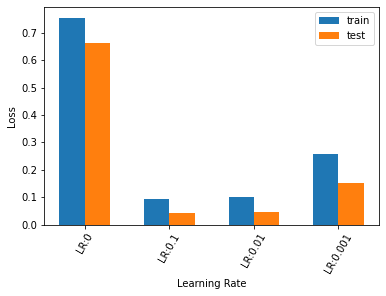

In [51]:
trn_acc = [v['train'] for k, v in parametro_dict.items()]
val_acc = [v['test'] for k, v in parametro_dict.items()]

width =0.3
#plt.figure(figsize=(30, 8), dpi=80)
plt.bar(np.arange(len(trn_acc)), trn_acc, width=width, label='train')
plt.bar(np.arange(len(val_acc))+ width, val_acc, width=width, label='test')
plt.xticks(np.arange(len(val_acc))+ width/2, list(parametro_dict.keys()),
           rotation=60)
plt.ylabel('Loss')
plt.xlabel("Learning Rate")
plt.legend(loc='upper right')
#plt.ylim(0.7, 1)
plt.savefig('LR num_hidden 2.png', bbox_inches='tight')
plt.show()

### Conclusión:

Podemos observar que nuestro modelo presentó resultados simulares para todos los Learning rate, excepto para cuando era igual a cero. Por lo tanto siempre tenemos que elegir un valor intermedio, no tan pequeño para que el modelo aprenda, ni muy alto, para que no diverja
<br>
<br>
A continuación paso a entrenar el modelo nuevamente con el mejor Learning Rate.

*Mejor Learning Rate*

In [52]:
print(best_hyper_dict)

{'LEARNING_RATE': 0.1}


In [53]:
model = FeedforwardNet(num_features=P, num_hidden = 2, output = 1)
# si tenemos GPU, llevamos el modelo ahí
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')    
model.to(device)   


FeedforwardNet(
  (fc1): Linear(in_features=3, out_features=2, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=2, out_features=1, bias=True)
)

In [54]:
model.train()  # modelo nuevamente activado para entrenamiento
LEARNING_RATE =  best_hyper_dict["LEARNING_RATE"]

WEIGHT_DECAY =   0.0001 # L2 coeficiente de regularización 

#    criterion = nn.L1Loss(reduction='sum') # función de costo L1
criterion = nn.MSELoss(reduction='sum') # función de costo L1 

optimizer = SGD(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

In [55]:
x_train_tensor = torch.from_numpy(np.float32(x_train_vec)).to(device)
y_train_tensor = torch.from_numpy(np.float32(y_train_vec)).to(device)
n_train = len(x_train_tensor)

x_test_tensor = torch.from_numpy(np.float32(x_test_vec)).to(device)
y_test_tensor = torch.from_numpy(np.float32(y_test_vec)).to(device)
n_test = len(x_test_tensor)

train_loss = []
test_loss = []
EPOCHS=10000

for epoch in range(EPOCHS):

    optimizer.zero_grad()                                # limpia todos los gradientes
    y_pred = model(x_train_tensor)                       # realiza predicción con el modelo (forward pass)
    loss = criterion(y_pred, y_train_tensor) / n_train   # calcula la pérdida (loss) y la divide por # obs
    loss.backward()                                      # calcula los gradientes (backward pass)
    optimizer.step()                                     # realiza paso de optimización, actualizando pesos

    train_loss.append(loss.detach().item())

    with torch.no_grad():
        y_pred = model(x_test_tensor)
        loss = criterion(y_pred, y_test_tensor) / n_test
        test_loss.append(loss.item())

    if epoch % (EPOCHS//10) == 0:
        print("epoch = {:02d}, train_loss = {:.3e}, test_loss = {:.3e}".format(epoch, train_loss[-1], test_loss[-1]))

epoch = 00, train_loss = 5.172e-01, test_loss = 4.050e-01
epoch = 1000, train_loss = 1.138e-01, test_loss = 7.633e-02
epoch = 2000, train_loss = 1.007e-01, test_loss = 7.261e-02
epoch = 3000, train_loss = 9.490e-02, test_loss = 6.460e-02
epoch = 4000, train_loss = 8.844e-02, test_loss = 5.301e-02
epoch = 5000, train_loss = 8.714e-02, test_loss = 5.023e-02
epoch = 6000, train_loss = 8.677e-02, test_loss = 4.931e-02
epoch = 7000, train_loss = 8.659e-02, test_loss = 4.887e-02
epoch = 8000, train_loss = 8.654e-02, test_loss = 4.874e-02
epoch = 9000, train_loss = 8.651e-02, test_loss = 4.869e-02


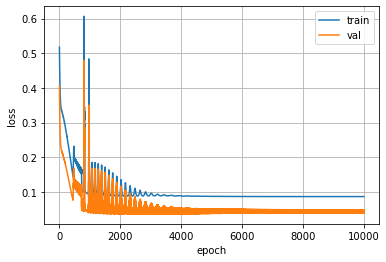

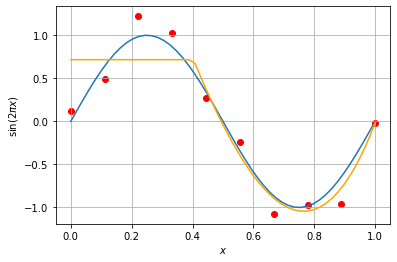

In [56]:
plt.figure()
plt.plot(np.arange(EPOCHS), train_loss)
plt.plot(np.arange(EPOCHS), test_loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.grid()

model.eval()
y_pred = model(x_test_tensor)
y_pred = y_pred.cpu().detach().numpy().squeeze()

plt.figure()
plt.plot(x_val, y_val)
plt.plot(x_val, y_pred, color='orange')
plt.scatter(x_train, y_train, color='red')
plt.ylabel('$\sin(2 \pi x)$')
plt.xlabel('$x$')
plt.grid()
plt.show()

### Conclusión:

Podemos observar que el mejor mejor learning rate de 0.1, nos da resultados satisfactorios, y que nuestro parecería que no overfittea. Tambien hay que notar esos "saltos" en el train y test loss, que se deben en parte a  la varianza y a como el modelo está aprendiendo, estos saltos se deben también al learning rate, y que al comienzose hace un ajuste "más brusco" de los datos, luego comienza a disminuir este efecto

### **Extra: Learning Rate variable**

La Tasa de Aprendizaje es un hiperparámetro importante en Gradiant Descent. Su valor determina la rapidez con la que la red neuronal converge a los mínimos. Normalmente, elegimos una tasa de aprendizaje y, en función de los resultados, cambiamos su valor para obtener el valor óptimo de LR. Si la tasa de aprendizaje es demasiado baja para la red neuronal, el proceso de convergencia será muy lento, y si es demasiado alta, la convergencia será rápida, pero existe la posibilidad de que la pérdida/loss se sobrepase o se valla para cualquier lado. Así que solemos ajustar nuestros parámetros para encontrar el mejor valor de la tasa de aprendizaje. 

¿Por qué ajustar la tasa de aprendizaje?
En lugar de tomar una tasa de aprendizaje constante, podemos empezar con un valor más alto de LR y luego seguir disminuyendo su valor periódicamente después de ciertas iteraciones. De esta manera podemos tener inicialmente una convergencia más rápida, mientras que reducimos las posibilidades de sobrepasar la pérdida/loss o que se dispare para otro lado. 

<br>
Para esto decidí usar pytorch y una de sus herramientas que son los *Scheduler*, que hay varios, pero elegí uno sencillo para cambiar el LR, a lo largo de distintas epochs

Para mi caso, elegí usar:
<br>
- **StepLR:** ya que multiplica la tasa de aprendizaje con gamma cada step_size epochs. Por ejemplo, si lr = 0.1, gamma = 0.1 y step_size = 10 entonces después de 10 epochs lr cambia a lr*step_size en este caso 0.01 y después de otros 10 epochs se convierte en 0.001.

[Fuente](https://www.geeksforgeeks.org/adjusting-learning-rate-of-a-neural-network-in-pytorch/)



Empezaremos con 0.1 de LR, que es un valor, bastante grande para las primeras iteraciones


In [57]:
model = FeedforwardNet(num_features=P, num_hidden = 2, output = 1)
# si tenemos GPU, llevamos el modelo ahí
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')    
model.to(device)   

FeedforwardNet(
  (fc1): Linear(in_features=3, out_features=2, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=2, out_features=1, bias=True)
)

In [58]:
from torch.optim.lr_scheduler import ReduceLROnPlateau,StepLR


model.train()  # modelo nuevamente activado para entrenamiento
LEARNING_RATE =  0.1

WEIGHT_DECAY =   0.0001 # L2 coeficiente de regularización 

#    criterion = nn.L1Loss(reduction='sum') # función de costo L1
criterion = nn.MSELoss(reduction='sum') # función de costo L1 

optimizer = SGD(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

scheduler = StepLR(optimizer, step_size=1500, gamma=0.1)
#Elegí un step_size de 1500 para probar, osea que se ruduciría 10000/1500, osea unas 6 veces el learning rate


** Funcion para obtener el learning Rate e imprimirlo **

In [59]:

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']
get_lr(optimizer)

0.1

In [60]:
x_train_tensor = torch.from_numpy(np.float32(x_train_vec)).to(device)
y_train_tensor = torch.from_numpy(np.float32(y_train_vec)).to(device)
n_train = len(x_train_tensor)

x_test_tensor = torch.from_numpy(np.float32(x_test_vec)).to(device)
y_test_tensor = torch.from_numpy(np.float32(y_test_vec)).to(device)
n_test = len(x_test_tensor)

train_loss = []
test_loss = []
EPOCHS=10000

for epoch in range(EPOCHS):
    #Este .step() lo que hace es cuando lo llamamos 1500 veces, va a reducir el step size, por el factor gamma que le indicamos anteriormente.
    scheduler.step()
    optimizer.zero_grad()                                # limpia todos los gradientes
    y_pred = model(x_train_tensor)                       # realiza predicción con el modelo (forward pass)
    loss = criterion(y_pred, y_train_tensor) / n_train   # calcula la pérdida (loss) y la divide por # obs
    loss.backward()                                      # calcula los gradientes (backward pass)
    optimizer.step()                                     # realiza paso de optimización, actualizando pesos

    train_loss.append(loss.detach().item())

    with torch.no_grad():
        y_pred = model(x_test_tensor)
        loss = criterion(y_pred, y_test_tensor) / n_test
        test_loss.append(loss.item())

    if epoch % (EPOCHS//10) == 0:
        print(f"LR: {get_lr(optimizer)}")
        print("epoch = {:02d}, train_loss = {:.3e}, test_loss = {:.3e}".format(epoch, train_loss[-1], test_loss[-1]))
    

LR: 0.1
epoch = 00, train_loss = 8.256e-01, test_loss = 5.908e-01
LR: 0.1
epoch = 1000, train_loss = 9.428e-02, test_loss = 4.360e-02
LR: 0.010000000000000002
epoch = 2000, train_loss = 8.807e-02, test_loss = 4.148e-02
LR: 0.0010000000000000002
epoch = 3000, train_loss = 8.667e-02, test_loss = 4.143e-02
LR: 0.0010000000000000002
epoch = 4000, train_loss = 8.657e-02, test_loss = 4.144e-02
LR: 0.00010000000000000003
epoch = 5000, train_loss = 8.653e-02, test_loss = 4.145e-02
LR: 1.0000000000000004e-05
epoch = 6000, train_loss = 8.652e-02, test_loss = 4.145e-02
LR: 1.0000000000000004e-05
epoch = 7000, train_loss = 8.652e-02, test_loss = 4.145e-02
LR: 1.0000000000000004e-06
epoch = 8000, train_loss = 8.652e-02, test_loss = 4.145e-02
LR: 1.0000000000000005e-07
epoch = 9000, train_loss = 8.652e-02, test_loss = 4.145e-02


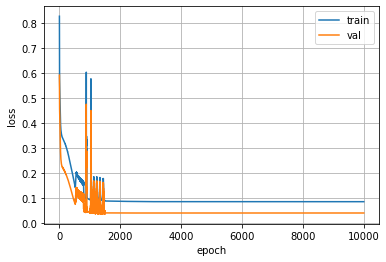

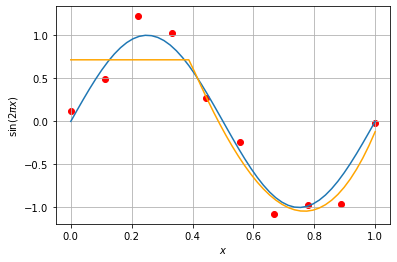

In [61]:
plt.figure()
plt.plot(np.arange(EPOCHS), train_loss)
plt.plot(np.arange(EPOCHS), test_loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.grid()

model.eval()
y_pred = model(x_test_tensor)
y_pred = y_pred.cpu().detach().numpy().squeeze()

plt.figure()
plt.plot(x_val, y_val)
plt.plot(x_val, y_pred, color='orange')
plt.scatter(x_train, y_train, color='red')
plt.ylabel('$\sin(2 \pi x)$')
plt.xlabel('$x$')
plt.grid()
plt.show()

### Conclusión:
<br>
Podemos observar que con el Learning rate variable, nuestro modelo se ajusta bastante mejor a nuestros datos en comparacion con un learning Rate constante, ademas, de que no parece haber overfitting, ya que las curvas de train y test loss son constantes, es decir, la de train loss no decrece a la par de que la otra test loss crece.
<br>
<br>
También esos saltos que se ven en el gráfico del test y train loss se deben al LR, que al comienzo era muy grande y luego fué disminuyendo, por lo tanto los saltos fueron disminuyendo.
<br>
<br>
Si bien se ve "plana" tanto el train como el test loss, es posible que esten disminuyendo, pero es poco visible, ya que el Learning Rate es muy pequeño para las iteraciones o épocas mayores.

## 3. Con esta red neuronal, experimentar distintas funciones de activación, como la tangente hiperbólica (Tanh) o ReLU (buscar las mismas, por ejemplo, en la documentación de Pytorch).<a name="activity3"></a>
---

Ahora lo que voy a hacer es experimentar con diferentes funciones de activación tomando como parámetros estables los siguientes:

- Learning rate: 0.1
- Weight Decay: 0.0001
- Loss: MSELoss
- Optimizador: SGD

Estos parámetros permanecerán iguales mientras modificamos solamente la función de activación, para ver como el modelo se ve afectado por las mismas

In [62]:
parametro_dict= collections.OrderedDict()
EPOCHS=5000

### Tanh
![image](https://pytorch.org/docs/stable/_images/Tanh.png)

In [63]:
class FeedforwardNet(nn.Module):
    def __init__(self, num_features, num_hidden, output):
        super(FeedforwardNet, self).__init__()
        # completa con tu código aquí
        self.fc1 = torch.nn.Linear(num_features, num_hidden, bias=True)
        self.tanh = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(num_hidden, output, bias=True)
        
    def forward(self, x):
        # completa con tu código aquí
        out = self.fc1(x)
        out = self.tanh(out)
        out = self.fc2(out)
        return out

In [64]:
model = FeedforwardNet(num_features=P, num_hidden = 2, output = 1) #2 NODOS EN LA CAPA OCULTA
# si tenemos GPU, llevamos el modelo ahí
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')
model.to(device)


FeedforwardNet(
  (fc1): Linear(in_features=3, out_features=2, bias=True)
  (tanh): Tanh()
  (fc2): Linear(in_features=2, out_features=1, bias=True)
)

In [65]:

model.train()  # modelo nuevamente activado para entrenamiento
LEARNING_RATE =  0.1

WEIGHT_DECAY =   0.0001 # L2 coeficiente de regularización 

#    criterion = nn.L1Loss(reduction='sum') # función de costo L1
criterion = nn.MSELoss(reduction='sum') # función de costo L1 

optimizer = SGD(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

x_train_tensor = torch.from_numpy(np.float32(x_train_vec)).to(device)
y_train_tensor = torch.from_numpy(np.float32(y_train_vec)).to(device)
n_train = len(x_train_tensor)

x_test_tensor = torch.from_numpy(np.float32(x_test_vec)).to(device)
y_test_tensor = torch.from_numpy(np.float32(y_test_vec)).to(device)
n_test = len(x_test_tensor)

train_loss = []
test_loss = []

for epoch in range(EPOCHS):

    optimizer.zero_grad()                                # limpia todos los gradientes
    y_pred = model(x_train_tensor)                       # realiza predicción con el modelo (forward pass)
    loss = criterion(y_pred, y_train_tensor) / n_train   # calcula la pérdida (loss) y la divide por # obs
    loss.backward()                                      # calcula los gradientes (backward pass)
    optimizer.step()                                     # realiza paso de optimización, actualizando pesos

    train_loss.append(loss.detach().item())

    with torch.no_grad():
        y_pred = model(x_test_tensor)
        loss = criterion(y_pred, y_test_tensor) / n_test
        test_loss.append(loss.item())

    if epoch % (EPOCHS//10) == 0:
        print("epoch = {:02d}, train_loss = {:.3e}, test_loss = {:.3e}".format(epoch, train_loss[-1], test_loss[-1]))

parametro={}
parametro["train"]=train_loss[-1]
parametro["test"]=test_loss[-1]
parametro_dict[f"Tanh"]=parametro

epoch = 00, train_loss = 5.632e-01, test_loss = 4.325e-01
epoch = 500, train_loss = 1.556e-01, test_loss = 7.685e-02
epoch = 1000, train_loss = 6.653e-02, test_loss = 2.618e-02
epoch = 1500, train_loss = 5.301e-02, test_loss = 2.096e-02
epoch = 2000, train_loss = 6.100e-02, test_loss = 3.128e-02
epoch = 2500, train_loss = 6.310e-02, test_loss = 3.570e-02
epoch = 3000, train_loss = 6.337e-02, test_loss = 3.708e-02
epoch = 3500, train_loss = 6.323e-02, test_loss = 3.761e-02
epoch = 4000, train_loss = 6.267e-02, test_loss = 3.749e-02
epoch = 4500, train_loss = 6.190e-02, test_loss = 3.706e-02


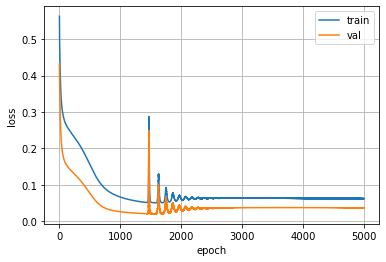

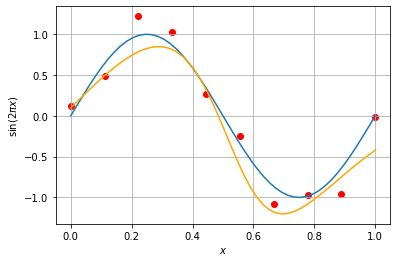

In [66]:
plt.figure()
plt.plot(np.arange(EPOCHS), train_loss)
plt.plot(np.arange(EPOCHS), test_loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.grid()

model.eval()
y_pred = model(x_test_tensor)
y_pred = y_pred.cpu().detach().numpy().squeeze()

plt.figure()
plt.plot(x_val, y_val)
plt.plot(x_val, y_pred, color='orange')
plt.scatter(x_train, y_train, color='red')
plt.ylabel('$\sin(2 \pi x)$')
plt.xlabel('$x$')
plt.grid()
plt.show()

Primero con TanH, podemos notar que cambiaron tanto la curva del train y test loss, como la curva de predicción. <br>
También podemos observar un "salto" al medio de la curva del train y test loss.
Todo esto con solo cambiar la función de activación

### Sigmoide
![image](https://pytorch.org/docs/stable/_images/Sigmoid.png)

In [67]:
class FeedforwardNet(nn.Module):
    def __init__(self, num_features, num_hidden, output):
        super(FeedforwardNet, self).__init__()
        # completa con tu código aquí
        self.fc1 = torch.nn.Linear(num_features, num_hidden, bias=True)
        self.Sigmoid = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(num_hidden, output, bias=True)
        
    def forward(self, x):
        # completa con tu código aquí
        out = self.fc1(x)
        out = self.Sigmoid(out)
        out = self.fc2(out)
        return out

In [68]:
model = FeedforwardNet(num_features=P, num_hidden = 2, output = 1) #2 NODOS EN LA CAPA OCULTA
# si tenemos GPU, llevamos el modelo ahí
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')
model.to(device)


FeedforwardNet(
  (fc1): Linear(in_features=3, out_features=2, bias=True)
  (Sigmoid): Sigmoid()
  (fc2): Linear(in_features=2, out_features=1, bias=True)
)

In [69]:
model.train()  # modelo nuevamente activado para entrenamiento
LEARNING_RATE =  0.1

WEIGHT_DECAY =   0.0001 # L2 coeficiente de regularización 

#    criterion = nn.L1Loss(reduction='sum') # función de costo L1
criterion = nn.MSELoss(reduction='sum') # función de costo L1 

optimizer = SGD(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

x_train_tensor = torch.from_numpy(np.float32(x_train_vec)).to(device)
y_train_tensor = torch.from_numpy(np.float32(y_train_vec)).to(device)
n_train = len(x_train_tensor)

x_test_tensor = torch.from_numpy(np.float32(x_test_vec)).to(device)
y_test_tensor = torch.from_numpy(np.float32(y_test_vec)).to(device)
n_test = len(x_test_tensor)

train_loss = []
test_loss = []

for epoch in range(EPOCHS):

    optimizer.zero_grad()                                # limpia todos los gradientes
    y_pred = model(x_train_tensor)                       # realiza predicción con el modelo (forward pass)
    loss = criterion(y_pred, y_train_tensor) / n_train   # calcula la pérdida (loss) y la divide por # obs
    loss.backward()                                      # calcula los gradientes (backward pass)
    optimizer.step()                                     # realiza paso de optimización, actualizando pesos

    train_loss.append(loss.detach().item())

    with torch.no_grad():
        y_pred = model(x_test_tensor)
        loss = criterion(y_pred, y_test_tensor) / n_test
        test_loss.append(loss.item())

    if epoch % (EPOCHS//10) == 0:
        print("epoch = {:02d}, train_loss = {:.3e}, test_loss = {:.3e}".format(epoch, train_loss[-1], test_loss[-1]))

parametro={}
parametro["train"]=train_loss[-1]
parametro["test"]=test_loss[-1]
parametro_dict[f"Sigmoid"]=parametro

epoch = 00, train_loss = 8.455e-01, test_loss = 6.222e-01
epoch = 500, train_loss = 2.740e-01, test_loss = 1.649e-01
epoch = 1000, train_loss = 2.465e-01, test_loss = 1.413e-01
epoch = 1500, train_loss = 2.233e-01, test_loss = 1.244e-01
epoch = 2000, train_loss = 1.931e-01, test_loss = 1.030e-01
epoch = 2500, train_loss = 1.527e-01, test_loss = 7.511e-02
epoch = 3000, train_loss = 1.146e-01, test_loss = 5.077e-02
epoch = 3500, train_loss = 9.201e-02, test_loss = 3.876e-02
epoch = 4000, train_loss = 7.984e-02, test_loss = 3.335e-02
epoch = 4500, train_loss = 7.114e-02, test_loss = 2.930e-02


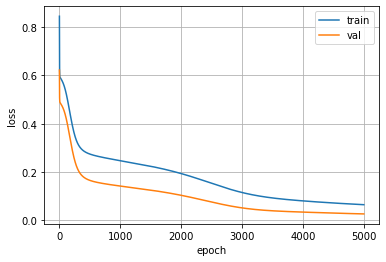

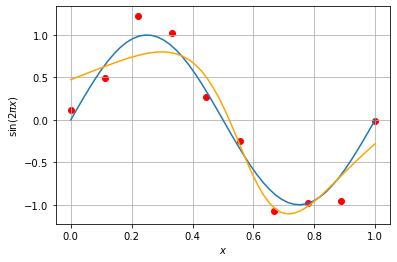

In [70]:
plt.figure()
plt.plot(np.arange(EPOCHS), train_loss)
plt.plot(np.arange(EPOCHS), test_loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.grid()

model.eval()
y_pred = model(x_test_tensor)
y_pred = y_pred.cpu().detach().numpy().squeeze()

plt.figure()
plt.plot(x_val, y_val)
plt.plot(x_val, y_pred, color='orange')
plt.scatter(x_train, y_train, color='red')
plt.ylabel('$\sin(2 \pi x)$')
plt.xlabel('$x$')
plt.grid()
plt.show()

Utilizando la función sigmoide, en particular, observo un descenso "más suave" del train y test loss, y un ajuste bastante mejor en comparación con la TanH y con el modelo visto en clases.

### RELU
![image](https://pytorch.org/docs/stable/_images/ReLU.png)

In [71]:
class FeedforwardNet(nn.Module):
    def __init__(self, num_features, num_hidden, output):
        super(FeedforwardNet, self).__init__()
        # completa con tu código aquí
        self.fc1 = torch.nn.Linear(num_features, num_hidden, bias=True)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(num_hidden, output, bias=True)
        
    def forward(self, x):
        # completa con tu código aquí
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [72]:
model = FeedforwardNet(num_features=P, num_hidden = 2, output = 1) #2 NODOS EN LA CAPA OCULTA
# si tenemos GPU, llevamos el modelo ahí
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')
model.to(device)


FeedforwardNet(
  (fc1): Linear(in_features=3, out_features=2, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=2, out_features=1, bias=True)
)

In [73]:
model.train()  # modelo nuevamente activado para entrenamiento
LEARNING_RATE =  0.1

WEIGHT_DECAY =   0.0001 # L2 coeficiente de regularización 

#    criterion = nn.L1Loss(reduction='sum') # función de costo L1
criterion = nn.MSELoss(reduction='sum') # función de costo L1 

optimizer = SGD(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

x_train_tensor = torch.from_numpy(np.float32(x_train_vec)).to(device)
y_train_tensor = torch.from_numpy(np.float32(y_train_vec)).to(device)
n_train = len(x_train_tensor)

x_test_tensor = torch.from_numpy(np.float32(x_test_vec)).to(device)
y_test_tensor = torch.from_numpy(np.float32(y_test_vec)).to(device)
n_test = len(x_test_tensor)

train_loss = []
test_loss = []

for epoch in range(EPOCHS):

    optimizer.zero_grad()                                # limpia todos los gradientes
    y_pred = model(x_train_tensor)                       # realiza predicción con el modelo (forward pass)
    loss = criterion(y_pred, y_train_tensor) / n_train   # calcula la pérdida (loss) y la divide por # obs
    loss.backward()                                      # calcula los gradientes (backward pass)
    optimizer.step()                                     # realiza paso de optimización, actualizando pesos

    train_loss.append(loss.detach().item())

    with torch.no_grad():
        y_pred = model(x_test_tensor)
        loss = criterion(y_pred, y_test_tensor) / n_test
        test_loss.append(loss.item())

    if epoch % (EPOCHS//10) == 0:
        print("epoch = {:02d}, train_loss = {:.3e}, test_loss = {:.3e}".format(epoch, train_loss[-1], test_loss[-1]))

parametro={}
parametro["train"]=train_loss[-1]
parametro["test"]=test_loss[-1]
parametro_dict[f"RELU"]=parametro

epoch = 00, train_loss = 5.701e-01, test_loss = 4.598e-01
epoch = 500, train_loss = 1.087e-01, test_loss = 5.082e-02
epoch = 1000, train_loss = 3.442e-02, test_loss = 1.858e-02
epoch = 1500, train_loss = 3.825e-02, test_loss = 2.352e-02
epoch = 2000, train_loss = 3.284e-02, test_loss = 2.176e-02
epoch = 2500, train_loss = 3.656e-02, test_loss = 2.463e-02
epoch = 3000, train_loss = 3.326e-02, test_loss = 2.337e-02
epoch = 3500, train_loss = 3.238e-02, test_loss = 2.337e-02
epoch = 4000, train_loss = 3.206e-02, test_loss = 2.340e-02
epoch = 4500, train_loss = 3.185e-02, test_loss = 2.336e-02


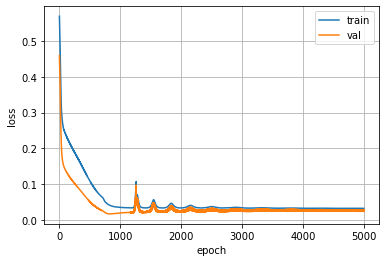

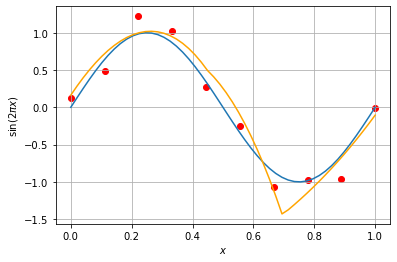

In [74]:
plt.figure()
plt.plot(np.arange(EPOCHS), train_loss)
plt.plot(np.arange(EPOCHS), test_loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.grid()

model.eval()
y_pred = model(x_test_tensor)
y_pred = y_pred.cpu().detach().numpy().squeeze()

plt.figure()
plt.plot(x_val, y_val)
plt.plot(x_val, y_pred, color='orange')
plt.scatter(x_train, y_train, color='red')
plt.ylabel('$\sin(2 \pi x)$')
plt.xlabel('$x$')
plt.grid()
plt.show()

Observando el gráfico de RELU, a mi parecer es la que mejor se comporta y la que tiene un descenso más rapido del train y test loss

### SELU
![image](https://pytorch.org/docs/stable/_images/SELU.png)

In [75]:
class FeedforwardNet(nn.Module):
    def __init__(self, num_features, num_hidden, output):
        super(FeedforwardNet, self).__init__()
        # completa con tu código aquí
        self.fc1 = torch.nn.Linear(num_features, num_hidden, bias=True)
        self.selu = torch.nn.SELU()
        self.fc2 = torch.nn.Linear(num_hidden, output, bias=True)
        
    def forward(self, x):
        # completa con tu código aquí
        out = self.fc1(x)
        out = self.selu(out)
        out = self.fc2(out)
        return out

In [76]:
model = FeedforwardNet(num_features=P, num_hidden = 2, output = 1) #2 NODOS EN LA CAPA OCULTA
# si tenemos GPU, llevamos el modelo ahí
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')
model.to(device)

FeedforwardNet(
  (fc1): Linear(in_features=3, out_features=2, bias=True)
  (selu): SELU()
  (fc2): Linear(in_features=2, out_features=1, bias=True)
)

In [77]:
model.train()  # modelo nuevamente activado para entrenamiento
LEARNING_RATE =  0.1

WEIGHT_DECAY =   0.0001 # L2 coeficiente de regularización 

#    criterion = nn.L1Loss(reduction='sum') # función de costo L1
criterion = nn.MSELoss(reduction='sum') # función de costo L1 

optimizer = SGD(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

x_train_tensor = torch.from_numpy(np.float32(x_train_vec)).to(device)
y_train_tensor = torch.from_numpy(np.float32(y_train_vec)).to(device)
n_train = len(x_train_tensor)

x_test_tensor = torch.from_numpy(np.float32(x_test_vec)).to(device)
y_test_tensor = torch.from_numpy(np.float32(y_test_vec)).to(device)
n_test = len(x_test_tensor)

train_loss = []
test_loss = []

for epoch in range(EPOCHS):

    optimizer.zero_grad()                                # limpia todos los gradientes
    y_pred = model(x_train_tensor)                       # realiza predicción con el modelo (forward pass)
    loss = criterion(y_pred, y_train_tensor) / n_train   # calcula la pérdida (loss) y la divide por # obs
    loss.backward()                                      # calcula los gradientes (backward pass)
    optimizer.step()                                     # realiza paso de optimización, actualizando pesos

    train_loss.append(loss.detach().item())

    with torch.no_grad():
        y_pred = model(x_test_tensor)
        loss = criterion(y_pred, y_test_tensor) / n_test
        test_loss.append(loss.item())

    if epoch % (EPOCHS//10) == 0:
        print("epoch = {:02d}, train_loss = {:.3e}, test_loss = {:.3e}".format(epoch, train_loss[-1], test_loss[-1]))

parametro={}
parametro["train"]=train_loss[-1]
parametro["test"]=test_loss[-1]
parametro_dict[f"SELU"]=parametro

epoch = 00, train_loss = 7.700e-01, test_loss = 5.476e-01
epoch = 500, train_loss = 2.926e-01, test_loss = 1.837e-01
epoch = 1000, train_loss = 4.308e-01, test_loss = 2.997e-01
epoch = 1500, train_loss = 2.682e-01, test_loss = 2.001e-01
epoch = 2000, train_loss = 2.512e-01, test_loss = 1.926e-01
epoch = 2500, train_loss = 2.384e-01, test_loss = 1.937e-01
epoch = 3000, train_loss = 1.411e-01, test_loss = 8.175e-02
epoch = 3500, train_loss = 1.199e-01, test_loss = 7.199e-02
epoch = 4000, train_loss = 1.026e-01, test_loss = 5.754e-02
epoch = 4500, train_loss = 6.797e-02, test_loss = 3.033e-02


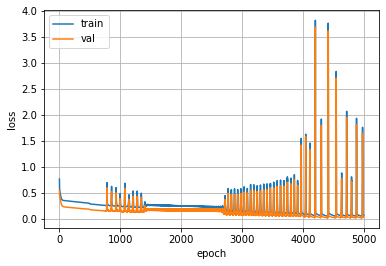

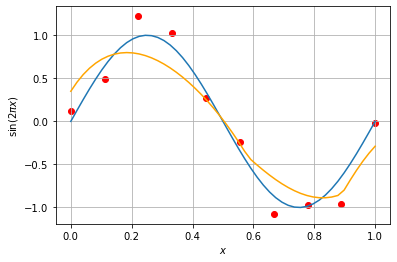

In [78]:
plt.figure()
plt.plot(np.arange(EPOCHS), train_loss)
plt.plot(np.arange(EPOCHS), test_loss)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.grid()

model.eval()
y_pred = model(x_test_tensor)
y_pred = y_pred.cpu().detach().numpy().squeeze()

plt.figure()
plt.plot(x_val, y_val)
plt.plot(x_val, y_pred, color='orange')
plt.scatter(x_train, y_train, color='red')
plt.ylabel('$\sin(2 \pi x)$')
plt.xlabel('$x$')
plt.grid()
plt.show()

La función SELU, fue la que, a mi parecer presenta un comportamiento inesperado en el gráfico del test y train loss, ya que hasta el momento esos saltos que podemos observar, se presentaban an comienzo del gráfico e iban disminuyendo, caso contrario con este modelo.
<br>
Pero a pesar de eso, el modelo parece presentar resultados casí identicos al modelo base visto en clases, donde tambien no pareceria tener overfitting.

### Gráfico comparando el Loss de distintas funciones de activación

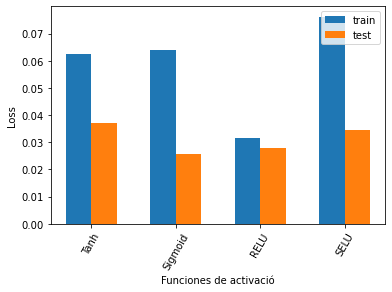

In [79]:
trn_acc = [v['train'] for k, v in parametro_dict.items()]
val_acc = [v['test'] for k, v in parametro_dict.items()]

width =0.3
#plt.figure(figsize=(30, 8), dpi=80)
plt.bar(np.arange(len(trn_acc)), trn_acc, width=width, label='train')
plt.bar(np.arange(len(val_acc))+ width, val_acc, width=width, label='test')
plt.xticks(np.arange(len(val_acc))+ width/2, list(parametro_dict.keys()),
           rotation=60)
plt.ylabel('Loss')
plt.xlabel("Funciones de activació")
plt.legend(loc='upper right')
#plt.ylim(0.7, 1)
plt.savefig('Funciones de activacion.png', bbox_inches='tight')
plt.show()

### Conclusión:

<br>
Podemos observar que el modelo con la función de activación con menor LOSS fue RELU, que es a su vez una de las funciones de activación más recomendables para usar como primer medida.


Podemos destacar que, en el gráfico del train loss y test loss a lo largo de las epochs para la función SELU, fué, a mi parecer el más llamativo, debido a la forma escalonada del train loss, a medida que cambian las épocas.
Tambien, las predicciones del modelo con RELU, fueron las mejores, ya que podemos ver como la curva predicha, se asemeja bastante a la función sinusoidal, además de que no presenta grandes saltos en el gráfico.

Por último, para el caso de la SELU, el Train LOSS es más alto, pero el test loss, no difiere en gran medida en comparacion con los otros modelos, donde esto se ven claramente en el gráfico de barras.
<br>
<br> 
Ejecuté estas pruebas muchas veces y los resultaron fueron en general los que describí, pero debido a la aleatoriedad, esto puede cambiar.

## 4. Evaluar cómo cambia la convergencia de esta red neuronal con distintos valores de batch size y learning rate.<a name="activity4"></a>
---
Como siempre tomaremos como base el mismo modelo que venimos usando hace rato con:
<br>
- Learning rate: 0.1
- Weight Decay: 0.0001
- Loss: MSELoss
- Optimizador: SGD
- Epochs: 5000

In [80]:
class FeedforwardNet(nn.Module):
    def __init__(self, num_features, num_hidden, output):
        super(FeedforwardNet, self).__init__()
        # completa con tu código aquí
        self.fc1 = torch.nn.Linear(num_features, num_hidden, bias=True)
        self.ReLU = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(num_hidden, output, bias=True)
        
    def forward(self, x):
        # completa con tu código aquí
        out = self.fc1(x)
        out = self.ReLU(out)
        out = self.fc2(out)
        return out

Longitud Train data:10 
Logitud Train loader:10
Learning rate:0.1, Batch Size: 1
epoch = 00, train_loss = 7.364e+00, val_loss = 2.204e+01
epoch = 500, train_loss = 1.450e+00, val_loss = 2.196e+00
epoch = 1000, train_loss = 1.124e+00, val_loss = 4.388e+00
epoch = 1500, train_loss = 1.503e+00, val_loss = 2.160e+00
epoch = 2000, train_loss = 1.265e+00, val_loss = 2.452e+00
epoch = 2500, train_loss = 1.399e+00, val_loss = 2.085e+00
epoch = 3000, train_loss = 1.113e+00, val_loss = 2.248e+00
epoch = 3500, train_loss = 1.359e+00, val_loss = 2.138e+00
epoch = 4000, train_loss = 9.885e-01, val_loss = 4.521e+00
epoch = 4500, train_loss = 1.419e+00, val_loss = 2.272e+00


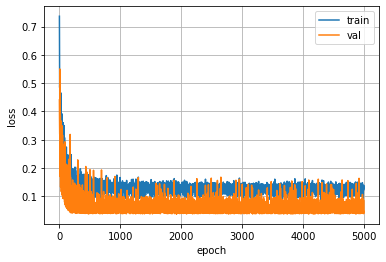

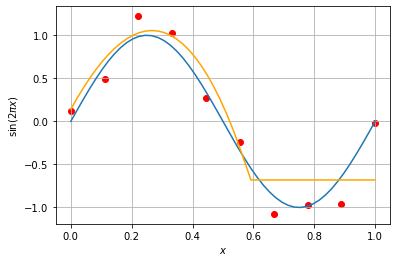

Longitud Train data:10 
Logitud Train loader:10
Learning rate:0.01, Batch Size: 1
epoch = 00, train_loss = 8.492e+00, val_loss = 3.312e+01
epoch = 500, train_loss = 1.510e+00, val_loss = 3.610e+00
epoch = 1000, train_loss = 1.068e+00, val_loss = 2.334e+00
epoch = 1500, train_loss = 9.999e-01, val_loss = 2.051e+00
epoch = 2000, train_loss = 9.932e-01, val_loss = 2.245e+00
epoch = 2500, train_loss = 9.791e-01, val_loss = 2.131e+00
epoch = 3000, train_loss = 9.576e-01, val_loss = 2.528e+00
epoch = 3500, train_loss = 9.572e-01, val_loss = 2.417e+00
epoch = 4000, train_loss = 9.914e-01, val_loss = 2.235e+00
epoch = 4500, train_loss = 9.796e-01, val_loss = 2.034e+00


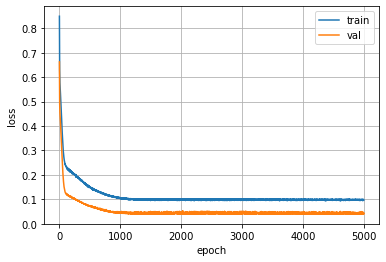

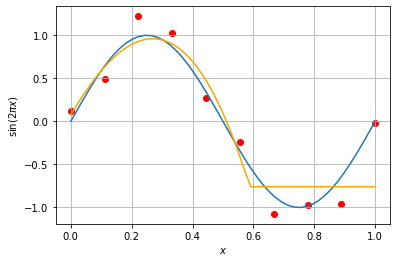

Longitud Train data:10 
Logitud Train loader:10
Learning rate:0.001, Batch Size: 1
epoch = 00, train_loss = 6.438e+00, val_loss = 2.642e+01
epoch = 500, train_loss = 5.964e+00, val_loss = 2.451e+01
epoch = 1000, train_loss = 5.964e+00, val_loss = 2.451e+01
epoch = 1500, train_loss = 5.964e+00, val_loss = 2.451e+01
epoch = 2000, train_loss = 5.964e+00, val_loss = 2.451e+01
epoch = 2500, train_loss = 5.964e+00, val_loss = 2.451e+01
epoch = 3000, train_loss = 5.964e+00, val_loss = 2.451e+01
epoch = 3500, train_loss = 5.964e+00, val_loss = 2.451e+01
epoch = 4000, train_loss = 5.964e+00, val_loss = 2.451e+01
epoch = 4500, train_loss = 5.964e+00, val_loss = 2.451e+01


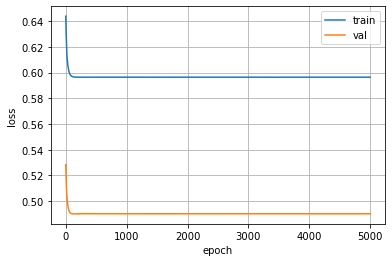

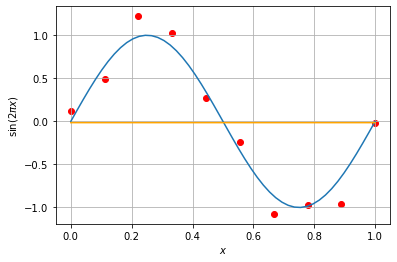

Longitud Train data:10 
Logitud Train loader:10
Learning rate:0.0001, Batch Size: 1
epoch = 00, train_loss = 5.868e+00, val_loss = 2.405e+01
epoch = 500, train_loss = 4.818e+00, val_loss = 1.914e+01
epoch = 1000, train_loss = 4.171e+00, val_loss = 1.599e+01
epoch = 1500, train_loss = 3.637e+00, val_loss = 1.345e+01
epoch = 2000, train_loss = 3.247e+00, val_loss = 1.155e+01
epoch = 2500, train_loss = 3.012e+00, val_loss = 1.034e+01
epoch = 3000, train_loss = 2.815e+00, val_loss = 9.292e+00
epoch = 3500, train_loss = 2.647e+00, val_loss = 8.419e+00
epoch = 4000, train_loss = 2.507e+00, val_loss = 7.706e+00
epoch = 4500, train_loss = 2.393e+00, val_loss = 7.156e+00


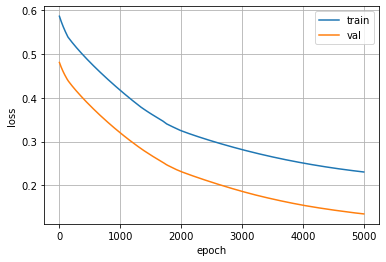

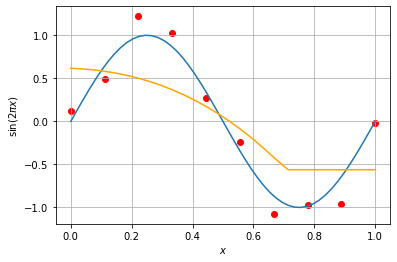

Longitud Train data:10 
Logitud Train loader:5
Learning rate:0.1, Batch Size: 2
epoch = 00, train_loss = 4.142e+00, val_loss = 2.334e+01
epoch = 500, train_loss = 1.786e-01, val_loss = 1.807e+00
epoch = 1000, train_loss = 9.983e-02, val_loss = 2.913e-01
epoch = 1500, train_loss = 1.571e-01, val_loss = 1.391e+00
epoch = 2000, train_loss = 1.024e-01, val_loss = 9.609e-01
epoch = 2500, train_loss = 9.014e-02, val_loss = 3.183e+00
epoch = 3000, train_loss = 1.163e-01, val_loss = 1.397e+00
epoch = 3500, train_loss = 1.405e-01, val_loss = 1.106e+00
epoch = 4000, train_loss = 1.638e-01, val_loss = 1.143e+00
epoch = 4500, train_loss = 2.003e-01, val_loss = 6.217e-01


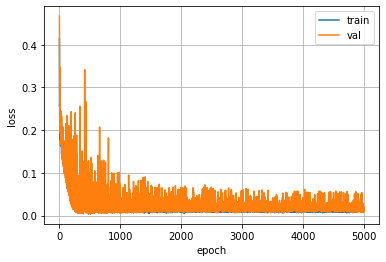

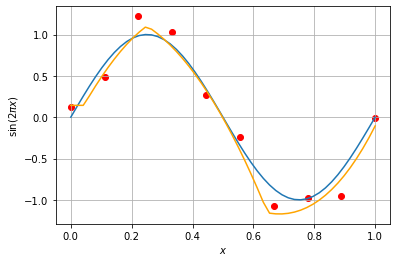

Longitud Train data:10 
Logitud Train loader:5
Learning rate:0.01, Batch Size: 2
epoch = 00, train_loss = 3.124e+00, val_loss = 2.525e+01
epoch = 500, train_loss = 3.012e+00, val_loss = 2.451e+01
epoch = 1000, train_loss = 2.988e+00, val_loss = 2.451e+01
epoch = 1500, train_loss = 2.992e+00, val_loss = 2.451e+01
epoch = 2000, train_loss = 2.999e+00, val_loss = 2.451e+01
epoch = 2500, train_loss = 3.013e+00, val_loss = 2.451e+01
epoch = 3000, train_loss = 2.999e+00, val_loss = 2.451e+01
epoch = 3500, train_loss = 3.022e+00, val_loss = 2.451e+01
epoch = 4000, train_loss = 2.981e+00, val_loss = 2.451e+01
epoch = 4500, train_loss = 3.011e+00, val_loss = 2.451e+01


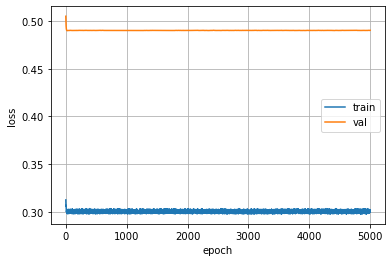

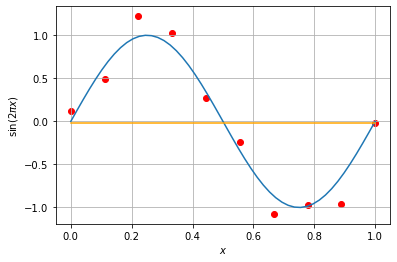

Longitud Train data:10 
Logitud Train loader:5
Learning rate:0.001, Batch Size: 2
epoch = 00, train_loss = 2.891e+00, val_loss = 2.401e+01
epoch = 500, train_loss = 1.584e+00, val_loss = 1.048e+01
epoch = 1000, train_loss = 1.396e+00, val_loss = 8.507e+00
epoch = 1500, train_loss = 1.339e+00, val_loss = 7.944e+00
epoch = 2000, train_loss = 1.298e+00, val_loss = 7.578e+00
epoch = 2500, train_loss = 1.254e+00, val_loss = 7.247e+00
epoch = 3000, train_loss = 1.214e+00, val_loss = 6.943e+00
epoch = 3500, train_loss = 1.170e+00, val_loss = 6.670e+00
epoch = 4000, train_loss = 1.130e+00, val_loss = 6.366e+00
epoch = 4500, train_loss = 1.089e+00, val_loss = 6.080e+00


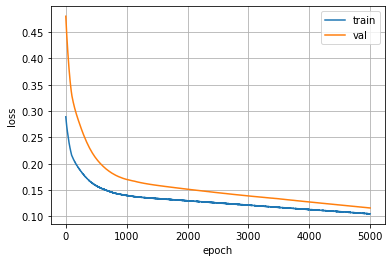

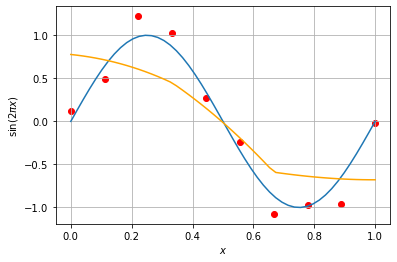

Longitud Train data:10 
Logitud Train loader:5
Learning rate:0.0001, Batch Size: 2
epoch = 00, train_loss = 5.567e+00, val_loss = 5.139e+01
epoch = 500, train_loss = 3.825e+00, val_loss = 3.358e+01
epoch = 1000, train_loss = 3.216e+00, val_loss = 2.726e+01
epoch = 1500, train_loss = 2.989e+00, val_loss = 2.486e+01
epoch = 2000, train_loss = 2.893e+00, val_loss = 2.382e+01
epoch = 2500, train_loss = 2.837e+00, val_loss = 2.322e+01
epoch = 3000, train_loss = 2.786e+00, val_loss = 2.271e+01
epoch = 3500, train_loss = 2.737e+00, val_loss = 2.222e+01
epoch = 4000, train_loss = 2.692e+00, val_loss = 2.176e+01
epoch = 4500, train_loss = 2.643e+00, val_loss = 2.127e+01


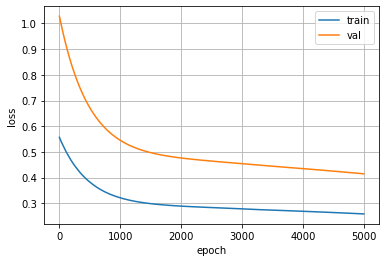

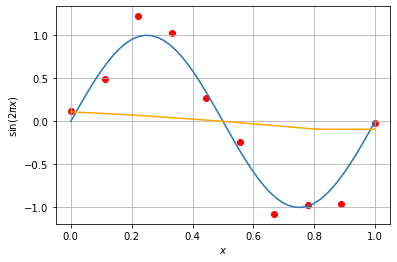

Longitud Train data:10 
Logitud Train loader:2
Learning rate:0.1, Batch Size: 5
epoch = 00, train_loss = 1.342e+00, val_loss = 2.671e+01
epoch = 500, train_loss = 2.827e-01, val_loss = 4.284e+00
epoch = 1000, train_loss = 1.870e-01, val_loss = 3.370e+00
epoch = 1500, train_loss = 1.760e-01, val_loss = 2.582e+00
epoch = 2000, train_loss = 1.765e-01, val_loss = 2.431e+00
epoch = 2500, train_loss = 1.851e-01, val_loss = 2.284e+00
epoch = 3000, train_loss = 1.839e-01, val_loss = 1.867e+00
epoch = 3500, train_loss = 1.960e-01, val_loss = 2.729e+00
epoch = 4000, train_loss = 1.930e-01, val_loss = 3.732e+00
epoch = 4500, train_loss = 1.840e-01, val_loss = 2.327e+00


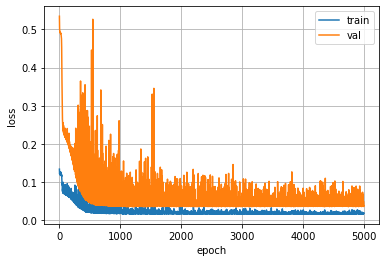

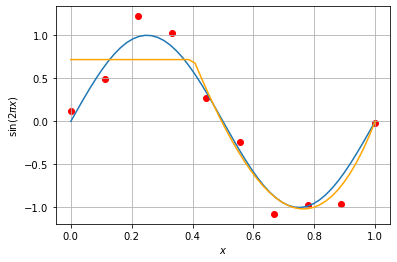

Longitud Train data:10 
Logitud Train loader:2
Learning rate:0.01, Batch Size: 5
epoch = 00, train_loss = 2.049e+00, val_loss = 4.487e+01
epoch = 500, train_loss = 7.056e-01, val_loss = 1.164e+01
epoch = 1000, train_loss = 6.550e-01, val_loss = 1.057e+01
epoch = 1500, train_loss = 5.906e-01, val_loss = 9.181e+00
epoch = 2000, train_loss = 4.845e-01, val_loss = 7.276e+00
epoch = 2500, train_loss = 3.783e-01, val_loss = 5.018e+00
epoch = 3000, train_loss = 2.605e-01, val_loss = 3.330e+00
epoch = 3500, train_loss = 2.131e-01, val_loss = 2.657e+00
epoch = 4000, train_loss = 1.991e-01, val_loss = 2.285e+00
epoch = 4500, train_loss = 1.856e-01, val_loss = 2.135e+00


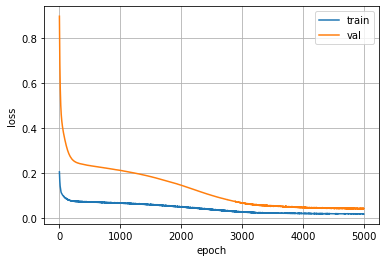

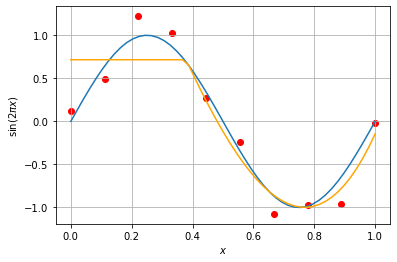

Longitud Train data:10 
Logitud Train loader:2
Learning rate:0.001, Batch Size: 5
epoch = 00, train_loss = 1.222e+00, val_loss = 2.508e+01
epoch = 500, train_loss = 1.171e+00, val_loss = 2.400e+01
epoch = 1000, train_loss = 1.153e+00, val_loss = 2.356e+01
epoch = 1500, train_loss = 1.120e+00, val_loss = 2.279e+01
epoch = 2000, train_loss = 1.065e+00, val_loss = 2.148e+01
epoch = 2500, train_loss = 9.842e-01, val_loss = 1.952e+01
epoch = 3000, train_loss = 8.796e-01, val_loss = 1.697e+01
epoch = 3500, train_loss = 7.680e-01, val_loss = 1.423e+01
epoch = 4000, train_loss = 6.721e-01, val_loss = 1.182e+01
epoch = 4500, train_loss = 5.996e-01, val_loss = 9.947e+00


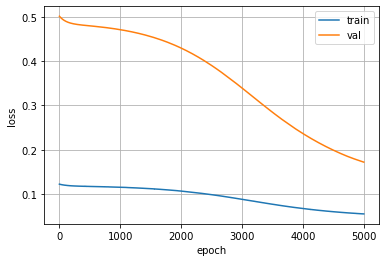

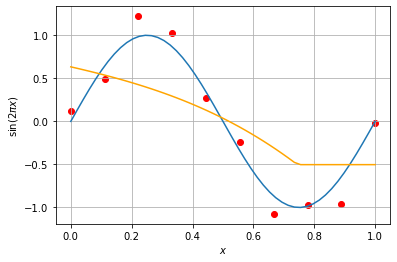

Longitud Train data:10 
Logitud Train loader:2
Learning rate:0.0001, Batch Size: 5
epoch = 00, train_loss = 1.658e+00, val_loss = 3.541e+01
epoch = 500, train_loss = 1.368e+00, val_loss = 2.849e+01
epoch = 1000, train_loss = 1.228e+00, val_loss = 2.519e+01
epoch = 1500, train_loss = 1.153e+00, val_loss = 2.342e+01
epoch = 2000, train_loss = 1.107e+00, val_loss = 2.236e+01
epoch = 2500, train_loss = 1.075e+00, val_loss = 2.164e+01
epoch = 3000, train_loss = 1.052e+00, val_loss = 2.109e+01
epoch = 3500, train_loss = 1.030e+00, val_loss = 2.059e+01
epoch = 4000, train_loss = 1.011e+00, val_loss = 2.019e+01
epoch = 4500, train_loss = 1.001e+00, val_loss = 1.993e+01


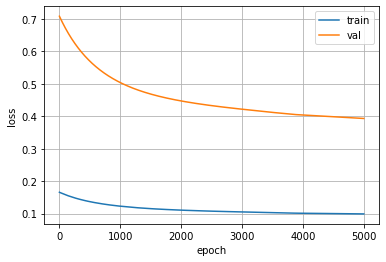

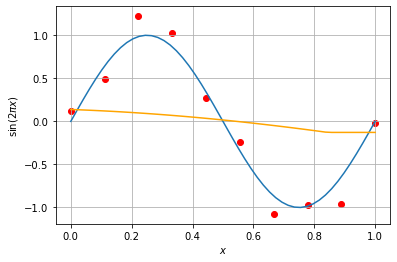

Longitud Train data:10 
Logitud Train loader:1
Learning rate:0.1, Batch Size: 10
epoch = 00, train_loss = 9.894e-01, val_loss = 3.084e+01
epoch = 500, train_loss = 6.624e-02, val_loss = 1.510e+00
epoch = 1000, train_loss = 3.768e-02, val_loss = 1.117e+00
epoch = 1500, train_loss = 3.704e-02, val_loss = 1.093e+00
epoch = 2000, train_loss = 3.661e-02, val_loss = 1.047e+00
epoch = 2500, train_loss = 3.619e-02, val_loss = 1.001e+00
epoch = 3000, train_loss = 1.937e-02, val_loss = 8.364e-01
epoch = 3500, train_loss = 1.790e-02, val_loss = 9.422e-01
epoch = 4000, train_loss = 1.783e-02, val_loss = 9.553e-01
epoch = 4500, train_loss = 1.781e-02, val_loss = 9.557e-01


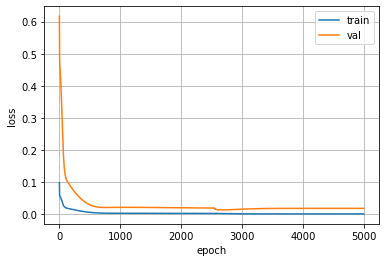

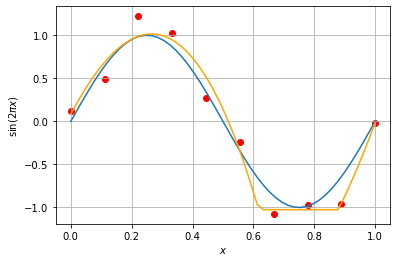

Longitud Train data:10 
Logitud Train loader:1
Learning rate:0.01, Batch Size: 10
epoch = 00, train_loss = 9.321e-01, val_loss = 3.984e+01
epoch = 500, train_loss = 3.853e-01, val_loss = 1.388e+01
epoch = 1000, train_loss = 3.365e-01, val_loss = 1.105e+01
epoch = 1500, train_loss = 3.198e-01, val_loss = 1.034e+01
epoch = 2000, train_loss = 2.995e-01, val_loss = 9.545e+00
epoch = 2500, train_loss = 2.747e-01, val_loss = 8.597e+00
epoch = 3000, train_loss = 2.460e-01, val_loss = 7.530e+00
epoch = 3500, train_loss = 2.163e-01, val_loss = 6.368e+00
epoch = 4000, train_loss = 1.844e-01, val_loss = 5.131e+00
epoch = 4500, train_loss = 1.522e-01, val_loss = 4.034e+00


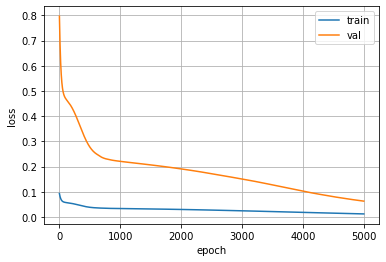

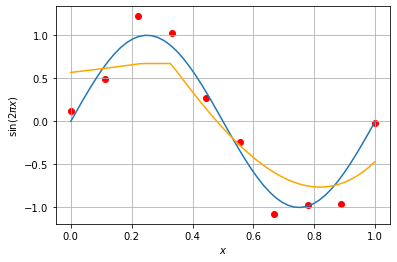

Longitud Train data:10 
Logitud Train loader:1
Learning rate:0.001, Batch Size: 10
epoch = 00, train_loss = 9.629e-01, val_loss = 4.395e+01
epoch = 500, train_loss = 5.316e-01, val_loss = 2.160e+01
epoch = 1000, train_loss = 4.709e-01, val_loss = 1.852e+01
epoch = 1500, train_loss = 4.279e-01, val_loss = 1.632e+01
epoch = 2000, train_loss = 3.967e-01, val_loss = 1.465e+01
epoch = 2500, train_loss = 3.750e-01, val_loss = 1.344e+01
epoch = 3000, train_loss = 3.608e-01, val_loss = 1.259e+01
epoch = 3500, train_loss = 3.519e-01, val_loss = 1.201e+01
epoch = 4000, train_loss = 3.465e-01, val_loss = 1.163e+01
epoch = 4500, train_loss = 3.433e-01, val_loss = 1.138e+01


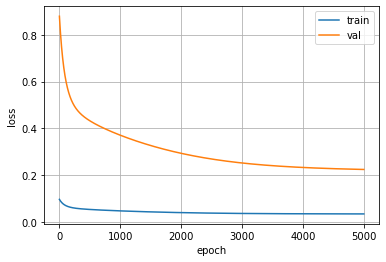

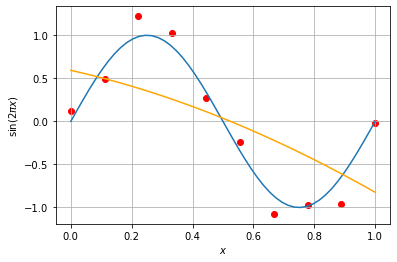

Longitud Train data:10 
Logitud Train loader:1
Learning rate:0.0001, Batch Size: 10
epoch = 00, train_loss = 8.168e-01, val_loss = 3.489e+01
epoch = 500, train_loss = 7.766e-01, val_loss = 3.295e+01
epoch = 1000, train_loss = 7.437e-01, val_loss = 3.137e+01
epoch = 1500, train_loss = 7.168e-01, val_loss = 3.008e+01
epoch = 2000, train_loss = 6.948e-01, val_loss = 2.902e+01
epoch = 2500, train_loss = 6.767e-01, val_loss = 2.817e+01
epoch = 3000, train_loss = 6.620e-01, val_loss = 2.747e+01
epoch = 3500, train_loss = 6.499e-01, val_loss = 2.690e+01
epoch = 4000, train_loss = 6.400e-01, val_loss = 2.644e+01
epoch = 4500, train_loss = 6.318e-01, val_loss = 2.606e+01


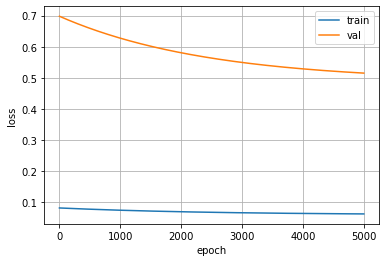

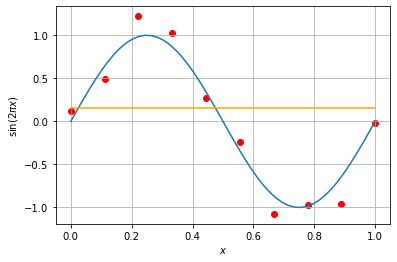

Wall time: 19min 49s


In [81]:
%%time
from torch.utils import data
BATCH_SIZE= [1,2,5,10]
LEARNING_RATE= [0.1,0.01,0.001,0.0001]
EPOCHS=5000
WEIGHT_DECAY = 0.0001  # L2 regularization coef.

parametro_dict= collections.OrderedDict()
for BZ in BATCH_SIZE:
    for LR in LEARNING_RATE:
        model = FeedforwardNet(num_features=P, num_hidden = 2, output = 1) #2 NODOS EN LA CAPA OCULTA

        model.to(device)

        criterion = nn.MSELoss(reduction='sum')

        #LEARNING_RATE = 0.1

        optimizer = SGD(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)


        train_data = data.TensorDataset(x_train_tensor, y_train_tensor)
        train_loader = data.DataLoader(dataset=train_data, batch_size=BZ, shuffle=True, num_workers=0,)

        val_data = data.TensorDataset(x_test_tensor, y_test_tensor)
        val_loader = data.DataLoader(dataset=val_data, batch_size=BZ, shuffle=False, num_workers=0,)

        print(f"Longitud Train data:{len(train_data)} \nLogitud Train loader:{len(train_loader)}")

        train_loss, val_loss = [], []

        print(f"Learning rate:{LR}, Batch Size: {BZ}")
        for epoch in range(EPOCHS):
            
            train_loss_acc = 0.    
            for x, y in train_loader:
                x.to(device, non_blocking=True)
                y.to(device, non_blocking=True)
                        
                optimizer.zero_grad()
                y_pred = model(x)
                loss = criterion(y_pred, y) / BZ
                loss.backward()
                optimizer.step()
                
                train_loss_acc += loss.detach().item()
            train_loss.append(train_loss_acc / len(train_data))        
            
            with torch.no_grad():
                val_loss_acc = 0.
                for x, y in val_loader:        
                    x.to(device, non_blocking=True)
                    y.to(device, non_blocking=True)        
                    
                    y_pred = model(x)      
                    loss = criterion(y_pred, y)
                    
                    val_loss_acc += loss.item()    
                val_loss.append(val_loss_acc / len(val_data))
                
            if epoch % (EPOCHS//10) == 0:
                print("epoch = {:02d}, train_loss = {:.3e}, val_loss = {:.3e}".format(epoch, train_loss_acc, val_loss_acc))
        
        
        plt.figure()
        plt.plot(np.arange(EPOCHS), train_loss)
        plt.plot(np.arange(EPOCHS), val_loss)
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'val'])
        plt.grid()

        model.eval()
        y_pred = model(x_test_tensor)
        y_pred = y_pred.cpu().detach().numpy().squeeze()

        plt.figure()
        plt.plot(x_val, y_val)
        plt.plot(x_val, y_pred, color='orange')
        plt.scatter(x_train, y_train, color='red')
        plt.ylabel('$\sin(2 \pi x)$')
        plt.xlabel('$x$')
        plt.grid()
        plt.show()
        parametro={}
        parametro["train"]=train_loss[-1]
        parametro["test"]=val_loss[-1]
        parametro_dict[f"LR:{LR}\n BZ:{BZ}"]=parametro



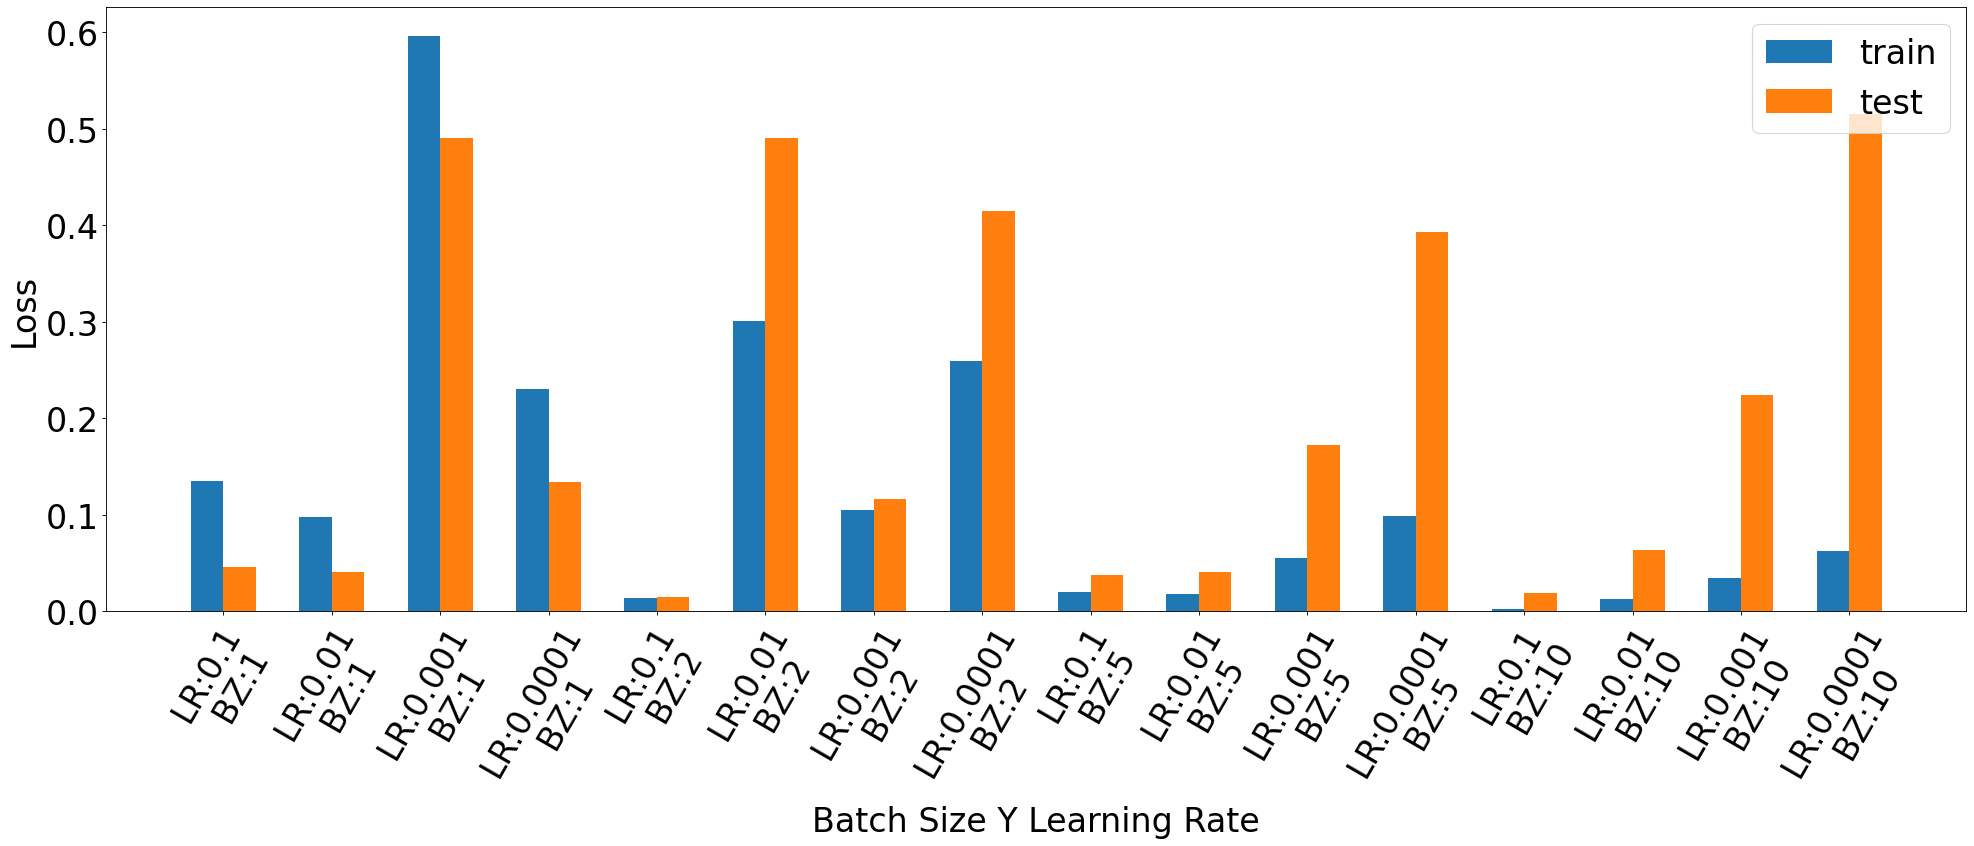

In [82]:
trn_acc = [v['train'] for k, v in parametro_dict.items()]
val_acc = [v['test'] for k, v in parametro_dict.items()]
plt.rcParams.update({'font.size': 30})
width =0.3
plt.figure(figsize=(30, 10), dpi=80)
plt.bar(np.arange(len(trn_acc)), trn_acc, width=width, label='train')
plt.bar(np.arange(len(val_acc))+ width, val_acc, width=width, label='test')
plt.xticks(np.arange(len(val_acc))+ width/2, list(parametro_dict.keys()),
           rotation=60)
plt.ylabel('Loss')
plt.xlabel("Batch Size Y Learning Rate")
plt.legend(loc='upper right')
#plt.ylim(0.7, 1)
plt.rcParams.update({'font.size': 30})

plt.savefig('BZ y LR diferentes.png', bbox_inches='tight')
plt.show()
#restauro la fuenta para los proximos gráficos


### Conclusión:

La elección de un batch size y un learning rate adecuado es clave para la convergencia del modelo, ya que si observamos los ejemplos, muchas veces podemos ver como el resultado es una línea recta, , ademas, si vemos el gráfico de las distintas funciones de perdidas, podemos ver que a veces el train loss es bajo y el test loss alto, esto es indicador de overfitting.

Tambien, muchas veces al ejecutar el modelo puede que este converja mejor que otras veces, insisto, esto es en parte a como aprende la red en sí.
<br>

El tamaño del batch size, fue decisivo a mi parecer, en la última red que entreno en este notebook (punto 7, ResNet10), donde experimenté resultados muy diferentes con disintos tamaños, tambien de que me ocasionó muchas veces un desborde de la memoria, que hace que el programa no pueda correr. Esta última conclusión fue posterior a experimentar con  "el dataset de juguete" de la función sinusoidal

In [83]:
#actualize el font size de los plot, porque si no es muy grande para el resto
plt.rcParams.update({'font.size': 12})


### El punto 6, se encuentra en el otro notebook

### 6. Buscar mejorar lo más posible la tasa de aciertos para todas las clases del CIFAR-10. Ej: data augmentation, distintos híper-parámetros, distinta arquitectura, distinto optimizador, o con lo que se te ocurra.<a name="activity6"></a>
---

Primero, para mejorar el modelo, decidí usar una Red neuronal, llamada RestNet18, ya preentrenada, donde solo voy a adaptar la última capa, para nuestro problema de clasificación de CIFAR-10


In [84]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

import torch
from torch import nn
from torchvision import models
from tqdm import tqdm_notebook as progressbar

Aquí realizamos todas las transformaciones necesarias para la entrada de la red neuronal.
<br>
Además de descargar el dataset y separarlos en train y test set.

In [85]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
transform = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

# descargamos CIFAR10 (train)
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform) 
# creamos un dataloader para recorrerlo
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2,pin_memory=True)

# hacemos lo mismo con el conjunto de test
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2,pin_memory=True)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


*Aquí podemos ver algunas imagenes al azar de nuestro dataset de CIFAR 10*

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


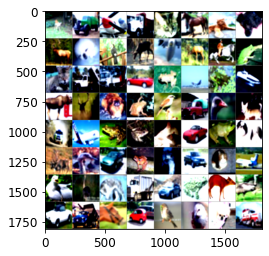

 deer truck plane truck
Primera imagen como tensor normalizado: 
 tensor([[[-1.3130, -1.3130, -1.3130,  ..., -1.5528, -1.5528, -1.5528],
         [-1.3130, -1.3130, -1.3130,  ..., -1.5528, -1.5528, -1.5528],
         [-1.3130, -1.3130, -1.3130,  ..., -1.5528, -1.5528, -1.5528],
         ...,
         [ 0.5707,  0.5707,  0.5707,  ...,  0.4679,  0.4679,  0.4679],
         [ 0.5707,  0.5707,  0.5707,  ...,  0.4679,  0.4679,  0.4679],
         [ 0.5707,  0.5707,  0.5707,  ...,  0.4679,  0.4679,  0.4679]],

        [[-1.1078, -1.1078, -1.1078,  ..., -1.3880, -1.3880, -1.3880],
         [-1.1078, -1.1078, -1.1078,  ..., -1.3880, -1.3880, -1.3880],
         [-1.1078, -1.1078, -1.1078,  ..., -1.3880, -1.3880, -1.3880],
         ...,
         [ 1.3081,  1.3081,  1.3081,  ...,  1.0980,  1.0980,  1.0980],
         [ 1.3081,  1.3081,  1.3081,  ...,  1.0980,  1.0980,  1.0980],
         [ 1.3081,  1.3081,  1.3081,  ...,  1.0980,  1.0980,  1.0980]],

        [[-1.0376, -1.0376, -1.0376,  ..., -1.2641

In [86]:
from funciones_utiles import imshow

# obtenemos aleatoriamente algunas imágenes de entrenamiento
dataiter = iter(trainloader)
images, labels = dataiter.next()

# mostramos dichas imágenes y sus categorías
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

print('Primera imagen como tensor normalizado: \n {}'.format(images[0]))

Aquí cargamos nuestros modelo preentrenado en la variable model.
<br>
He de mencionar que existen muchos modelos, en mi caso elegí RestNet18, podria haber elegido RestNet101,51, entre otros, pero debido a que modelos con mas capas tardan más, elegí este.
### RestNet18

In [87]:
model = models.resnet18(pretrained=True)
#model = models.densenet121(pretrained=True)


In [88]:

# se congelan todos los parámetros
for p in model.parameters():
    p.requires_grad_(False)

# reemplazamos la última capa lineal por una nueva adaptada a nuestro problema. 
# En el caso de los modelos resnet en pytorch, la última capa lineal corresponde al miembro .fc 
# (para ver la red en detalle hacer print(model))
in_features = model.fc.in_features  # se toma la cantidad de features de salida de la capa fc de resnet
num_classes = 10
model.fc = nn.Linear(in_features, num_classes)  # y se reemplaza la capa por una nueva capa lineal nuestra

# se guardan la lista de parámetros a actualizar que pasaremos al optimizador
parameters_to_update = [p for p in model.parameters() if p.requires_grad]

*Visualizamos los parámetros de nuestra RestNet18* así como nuestra Red

In [89]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [90]:
from prettytable import PrettyTable
def count_parameters(model):
    table = PrettyTable(["Modulos", "Parámetros"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        table.add_row([name, param])
        total_params+=param
    print(table)
    print(f"Total Parametros entrenables: {total_params}")
    return total_params
count_parameters(model)

+-----------+------------+
|  Modulos  | Parámetros |
+-----------+------------+
| fc.weight |    5120    |
|  fc.bias  |     10     |
+-----------+------------+
Total Parametros entrenables: 5130


5130

In [91]:
def total_parametros(model):
    return sum(p.numel() for p in model.parameters())

total_param_por_model={}


In [92]:
batch_size = len(trainloader)
num_workers = 4

Usé como optimizador a adam, ya que,
Adam es uno de los mejores optimizadores adaptativos en la mayoría de los casos.
<br> 
Además:

- Bueno con datos escasos: la tasa de aprendizaje adaptativo es perfecta para este tipo de conjuntos de datos.
- Adam es relativamente fácil de configurar cuando los parámetros de configuración predeterminados funcionan bien en la mayoría de los problemas.
- Adam combina las mejores propiedades de los algoritmos AdaGrad y RMSProp para proporcionar un algoritmo de optimización que puede manejar gradientes dispersos en problemas ruidosos

[Fuente](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)


In [93]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(parameters_to_update, lr=1.0)

In [94]:
def train(model, data_loader, criterion, optimizer, device):            
    model.train()
    running_loss = 0.
    running_acc = 0.
       
    for inputs, labels in data_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)
                
        optimizer.zero_grad()
        outputs = model(inputs)
        #print(outputs.shape)
        #print(labels.shape)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
           
        _, preds = torch.max(outputs, 1)
        
        running_loss += loss.item() * inputs.size(0)
        running_acc += torch.sum(preds == labels.data)
                
    running_loss /= len(data_loader.dataset)
    running_acc /= len(data_loader.dataset)
                
    return running_loss, running_acc

In [95]:
def validate(model, data_loader, criterion, device):          
    model.eval()
    running_loss = 0.
    running_acc = 0.
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
                        
            outputs = model(inputs)
            loss = criterion(outputs, labels)
           
            _, preds = torch.max(outputs, 1)
        
            running_loss += loss.item() * inputs.size(0)
            running_acc += torch.sum(preds == labels.data)
                
        running_loss /= len(data_loader.dataset)
        running_acc /= len(data_loader.dataset)
                
    return running_loss, running_acc 
 

In [96]:
parametro_dict= collections.OrderedDict()


In [97]:
from tqdm import tqdm_notebook as progressbar
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
num_epochs = 10
for epoch in progressbar(range(1, num_epochs+1)):
        train_loss, train_acc = train(model, trainloader, criterion, optimizer, device)
        
        val_loss, val_acc = validate(model, testloader, criterion, device)
        parametro={}
        parametro["train"]=train_acc
        parametro["test"]=val_acc
        parametro_dict[f"RestNet18"]=parametro
        print('[{}] loss: train={:.3f}, val={:.3f} -- accuracy: train={:.3f}, val={:.3f}'.format(epoch, train_loss, val_loss, train_acc, val_acc))

  0%|          | 0/10 [00:00<?, ?it/s]

[1] loss: train=50.800, val=36.216 -- accuracy: train=0.672, val=0.743
[2] loss: train=47.558, val=46.717 -- accuracy: train=0.716, val=0.734
[3] loss: train=53.251, val=65.079 -- accuracy: train=0.721, val=0.707
[4] loss: train=54.062, val=43.958 -- accuracy: train=0.729, val=0.764
[5] loss: train=57.321, val=83.776 -- accuracy: train=0.734, val=0.681
[6] loss: train=59.074, val=74.163 -- accuracy: train=0.733, val=0.722
[7] loss: train=60.249, val=87.466 -- accuracy: train=0.739, val=0.697
[8] loss: train=61.269, val=54.822 -- accuracy: train=0.737, val=0.749
[9] loss: train=58.395, val=68.454 -- accuracy: train=0.741, val=0.720
[10] loss: train=60.998, val=63.786 -- accuracy: train=0.740, val=0.738


In [98]:
total_param_por_model["RestNet18"]=total_parametros(model)

### ¡Explorando diferentes arquitecturas!
Si bien, conseguimos el objetivo de mejorar la red neuronal vista en clases que tenia un accuracy del 54% (con solo 2 Epochs) aproximadamente,me gustaría abordar este problema explorando diferentes arquitecturas que podemos implementar a la red neuronal.
<br>
Por motivos de comparación voy a escribir de nuevo el cifar-10 visto en clases, y ver como podemos mejorar la misma modificando la arquitectura de la red neuronal y no usando una ya creada como la RestNet18

In [99]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# descargamos CIFAR10 (train)
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform) 
# creamos un dataloader para recorrerlo
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2,pin_memory=True)

# hacemos lo mismo con el conjunto de test
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2,pin_memory=True)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


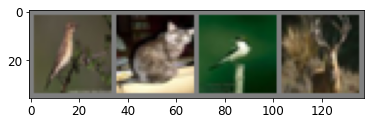

 bird   cat  bird  deer
Primera imagen como tensor normalizado: 
 tensor([[[-0.3725, -0.3647, -0.3490,  ..., -0.6784, -0.5216, -0.5686],
         [-0.3647, -0.3569, -0.3490,  ..., -0.5451, -0.5373, -0.4902],
         [-0.3490, -0.3490, -0.3412,  ..., -0.4745, -0.6392, -0.5216],
         ...,
         [-0.2706, -0.2941, -0.3020,  ..., -0.4588, -0.4902, -0.5137],
         [-0.2706, -0.2863, -0.2941,  ..., -0.4353, -0.4510, -0.4353],
         [-0.2706, -0.2863, -0.3020,  ..., -0.1294, -0.1529, -0.0824]],

        [[-0.4196, -0.4118, -0.3961,  ..., -0.6627, -0.4902, -0.5451],
         [-0.4118, -0.4039, -0.3961,  ..., -0.5451, -0.5059, -0.4745],
         [-0.3961, -0.3961, -0.3882,  ..., -0.4980, -0.6157, -0.5059],
         ...,
         [-0.2863, -0.2941, -0.2941,  ..., -0.4745, -0.4980, -0.5216],
         [-0.2863, -0.2863, -0.2863,  ..., -0.4510, -0.4667, -0.4510],
         [-0.2941, -0.2863, -0.2863,  ..., -0.1529, -0.1686, -0.0980]],

        [[-0.5451, -0.5373, -0.5216,  ..., -0.8196

In [100]:
from funciones_utiles import imshow

# obtenemos aleatoriamente algunas imágenes de entrenamiento
dataiter = iter(trainloader)
images, labels = dataiter.next()

# mostramos dichas imágenes y sus categorías
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

print('Primera imagen como tensor normalizado: \n {}'.format(images[0]))

In [101]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
    
        # interfaz de nn.Conv2d:
        # nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0) 
        self.conv1 = nn.Conv2d(3, 6, 5)
        # nn.MaxPool2d(kernel_size, stride=None, padding=0)
        self.pool = nn.MaxPool2d(2, 2) 
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        # 16 canales de salida * 5 alto de la imagen * 5 ancho de la imagen
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()


In [102]:
count_parameters(net)

+--------------+------------+
|   Modulos    | Parámetros |
+--------------+------------+
| conv1.weight |    450     |
|  conv1.bias  |     6      |
| conv2.weight |    2400    |
|  conv2.bias  |     16     |
|  fc1.weight  |   48000    |
|   fc1.bias   |    120     |
|  fc2.weight  |   10080    |
|   fc2.bias   |     84     |
|  fc3.weight  |    840     |
|   fc3.bias   |     10     |
+--------------+------------+
Total Parametros entrenables: 62006


62006

In [103]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [104]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
net.to(device)
num_epochs = 10
for epoch in progressbar(range(1, num_epochs+1)):
        train_loss, train_acc = train(net, trainloader, criterion, optimizer, device)
        
        val_loss, val_acc = validate(net, testloader, criterion, device)
        parametro={}
        parametro["train"]=train_acc
        parametro["test"]=val_acc
        parametro_dict[f"Net Base"]=parametro
        print('[{}] loss: train={:.3f}, val={:.3f} -- accuracy: train={:.3f}, val={:.3f}'.format(epoch, train_loss, val_loss, train_acc, val_acc))

  0%|          | 0/10 [00:00<?, ?it/s]

[1] loss: train=1.685, val=1.453 -- accuracy: train=0.379, val=0.482
[2] loss: train=1.330, val=1.312 -- accuracy: train=0.524, val=0.535
[3] loss: train=1.195, val=1.188 -- accuracy: train=0.575, val=0.587
[4] loss: train=1.109, val=1.244 -- accuracy: train=0.611, val=0.565
[5] loss: train=1.037, val=1.133 -- accuracy: train=0.636, val=0.606
[6] loss: train=0.985, val=1.112 -- accuracy: train=0.653, val=0.614
[7] loss: train=0.941, val=1.093 -- accuracy: train=0.670, val=0.627
[8] loss: train=0.904, val=1.076 -- accuracy: train=0.683, val=0.627
[9] loss: train=0.872, val=1.153 -- accuracy: train=0.691, val=0.613
[10] loss: train=0.841, val=1.151 -- accuracy: train=0.702, val=0.620


* Obtuvimos aproximadamente un 62% de accuracy, pero recordemos que esto es con 10 épocas, en clases usamos solo 2, así que, con solo aumentar la cantidad de épocas, mejoramos ligeramente el modelo.
<br> Veamos ahora otras diferentes arquitecturas más adelante 

In [105]:
total_param_por_model["Net Base"]=total_parametros(model)

In [106]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Tasa de aciertos para la clase %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Tasa de aciertos para la clase plane : 75 %
Tasa de aciertos para la clase   car : 63 %
Tasa de aciertos para la clase  bird : 43 %
Tasa de aciertos para la clase   cat : 33 %
Tasa de aciertos para la clase  deer : 61 %
Tasa de aciertos para la clase   dog : 59 %
Tasa de aciertos para la clase  frog : 75 %
Tasa de aciertos para la clase horse : 68 %
Tasa de aciertos para la clase  ship : 67 %
Tasa de aciertos para la clase truck : 71 %


### Width/anchura
Dada nuestra arquitectura feed-forward, hay un par de dimensiones que probablemente queramos explorar antes de entrar en más complicaciones. La primera dimensión es la anchura de la red: el número de neuronas por capa, o canales por convolución

<br>
Simplemente especificamos un mayor número de canales de salida en las convoluciones y aumentamos las capas posteriores en consecuencia, teniendo cuidado de cambiar la función de avance para reflejar el hecho de que ahora tendremos un vector más largo una vez que cambiemos a capas totalmente conectadas

<br>
Aquí fue agregando de manera arbitraría más neuronas.

In [107]:
class NetWidth(nn.Module):
    def __init__(self,n_chans1=32):
        super(NetWidth, self).__init__()
        self.n_chans1 = n_chans1

        # interfaz de nn.Conv2d:
        # nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0) 
        self.conv1 = nn.Conv2d(3, n_chans1, 5)
        # nn.MaxPool2d(kernel_size, stride=None, padding=0)
        self.pool = nn.MaxPool2d(2, 2) 
        self.conv2 = nn.Conv2d(n_chans1, n_chans1//2, 5)
        
        # 16 canales de salida * 5 alto de la imagen * 5 ancho de la imagen
        self.fc1 = nn.Linear((n_chans1//2) * 5 * 5, 120)  
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, (self.n_chans1//2) * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = NetWidth(64).cuda()

In [108]:
count_parameters(net)

+--------------+------------+
|   Modulos    | Parámetros |
+--------------+------------+
| conv1.weight |    4800    |
|  conv1.bias  |     64     |
| conv2.weight |   51200    |
|  conv2.bias  |     32     |
|  fc1.weight  |   96000    |
|   fc1.bias   |    120     |
|  fc2.weight  |   10080    |
|   fc2.bias   |     84     |
|  fc3.weight  |    840     |
|   fc3.bias   |     10     |
+--------------+------------+
Total Parametros entrenables: 163230


163230

Podemos ver que pasamos de tener 60000 parámetros aproximadamente, a tener unos 163.000 parámetros, veamos si esto aumenta o no nuestra precisión

In [109]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#model.to(device)
num_epochs = 10
for epoch in progressbar(range(1, num_epochs+1)):
        train_loss, train_acc = train(net, trainloader, criterion, optimizer, device)
        
        val_loss, val_acc = validate(net, testloader, criterion, device)
        parametro={}
        parametro["train"]=train_acc
        parametro["test"]=val_acc
        parametro_dict[f"Net Width"]=parametro
        print('[{}] loss: train={:.3f}, val={:.3f} -- accuracy: train={:.3f}, val={:.3f}'.format(epoch, train_loss, val_loss, train_acc, val_acc))

  0%|          | 0/10 [00:00<?, ?it/s]

[1] loss: train=1.562, val=1.268 -- accuracy: train=0.429, val=0.540
[2] loss: train=1.139, val=1.126 -- accuracy: train=0.597, val=0.608
[3] loss: train=0.957, val=1.017 -- accuracy: train=0.664, val=0.653
[4] loss: train=0.846, val=0.911 -- accuracy: train=0.706, val=0.685
[5] loss: train=0.757, val=0.925 -- accuracy: train=0.735, val=0.683
[6] loss: train=0.687, val=0.859 -- accuracy: train=0.759, val=0.715
[7] loss: train=0.631, val=0.890 -- accuracy: train=0.778, val=0.711
[8] loss: train=0.578, val=0.909 -- accuracy: train=0.795, val=0.708
[9] loss: train=0.532, val=0.991 -- accuracy: train=0.809, val=0.687
[10] loss: train=0.494, val=0.990 -- accuracy: train=0.825, val=0.702


Podemos ver como con esta modificación aumentamos bastante la accuracy.

In [110]:
total_param_por_model["Net Width"]=total_parametros(model)

In [111]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Tasa de aciertos para la clase %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Tasa de aciertos para la clase plane : 76 %
Tasa de aciertos para la clase   car : 81 %
Tasa de aciertos para la clase  bird : 65 %
Tasa de aciertos para la clase   cat : 45 %
Tasa de aciertos para la clase  deer : 59 %
Tasa de aciertos para la clase   dog : 68 %
Tasa de aciertos para la clase  frog : 71 %
Tasa de aciertos para la clase horse : 71 %
Tasa de aciertos para la clase  ship : 82 %
Tasa de aciertos para la clase truck : 79 %


### DROPOUT
<br>
La idea del droput es sencilla: eliminar una fracción aleatoria de salidas de las neuronas de la red, donde la aleatorización se produce en cada iteración de entrenamiento.
Este procedimiento genera efectivamente modelos ligeramente diferentes con topologías de red diferentes en cada iteración,dando a las neuronas del modelo menos oportunidades de colaborar en el proceso de memorización que ocurre durante el sobreajuste. Un punto de vista alternativo es que el abandono perturba las características que genera el modelo, ejerciendo un efecto cercano al aumento(data augmentation), pero esta vez en toda la red.

<br>
<br> 

 
*Algunas bibliografias consideran al droput como un tipo de data augmentation.*  [Fuente](https://arxiv.org/abs/1506.08700)



In [112]:
class NetDropOut(nn.Module):
    def __init__(self):
        super(NetDropOut, self).__init__()
    
        # interfaz de nn.Conv2d:
        # nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0) 
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv1_dropout = nn.Dropout2d(p=0.4) 
        # nn.MaxPool2d(kernel_size, stride=None, padding=0)
        self.pool = nn.MaxPool2d(2, 2) 
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv2_dropout = nn.Dropout2d(p=0.4) 
        # 16 canales de salida * 5 alto de la imagen * 5 ancho de la imagen
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.conv1_dropout(x) 
        x = self.pool(F.relu(self.conv2(x)))
        x = self.conv2_dropout(x)
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = NetDropOut().cuda()

In [113]:
count_parameters(net)

+--------------+------------+
|   Modulos    | Parámetros |
+--------------+------------+
| conv1.weight |    450     |
|  conv1.bias  |     6      |
| conv2.weight |    2400    |
|  conv2.bias  |     16     |
|  fc1.weight  |   48000    |
|   fc1.bias   |    120     |
|  fc2.weight  |   10080    |
|   fc2.bias   |     84     |
|  fc3.weight  |    840     |
|   fc3.bias   |     10     |
+--------------+------------+
Total Parametros entrenables: 62006


62006

In [114]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#model.to(device)
num_epochs = 40
for epoch in progressbar(range(1, num_epochs+1)):
        train_loss, train_acc = train(net, trainloader, criterion, optimizer, device)
        
        val_loss, val_acc = validate(net, testloader, criterion, device)
        parametro={}
        parametro["train"]=train_acc
        parametro["test"]=val_acc
        parametro_dict[f"Net DropOut"]=parametro
        print('[{}] loss: train={:.3f}, val={:.3f} -- accuracy: train={:.3f}, val={:.3f}'.format(epoch, train_loss, val_loss, train_acc, val_acc))

  0%|          | 0/40 [00:00<?, ?it/s]

[1] loss: train=2.033, val=1.753 -- accuracy: train=0.251, val=0.384
[2] loss: train=1.823, val=1.635 -- accuracy: train=0.338, val=0.413
[3] loss: train=1.760, val=1.630 -- accuracy: train=0.364, val=0.422
[4] loss: train=1.721, val=1.558 -- accuracy: train=0.377, val=0.448
[5] loss: train=1.696, val=1.576 -- accuracy: train=0.387, val=0.431
[6] loss: train=1.677, val=1.551 -- accuracy: train=0.392, val=0.454
[7] loss: train=1.663, val=1.492 -- accuracy: train=0.398, val=0.451
[8] loss: train=1.644, val=1.468 -- accuracy: train=0.405, val=0.484
[9] loss: train=1.634, val=1.478 -- accuracy: train=0.410, val=0.476
[10] loss: train=1.617, val=1.489 -- accuracy: train=0.416, val=0.469
[11] loss: train=1.607, val=1.458 -- accuracy: train=0.421, val=0.482
[12] loss: train=1.602, val=1.436 -- accuracy: train=0.426, val=0.496
[13] loss: train=1.592, val=1.422 -- accuracy: train=0.432, val=0.492
[14] loss: train=1.595, val=1.420 -- accuracy: train=0.427, val=0.502
[15] loss: train=1.579, val=1

Obtuvimos una precisión de aproximadamente un 50%, esto es debido al dropout, que está pensando para reducir el overfitting, y a lo mejor es necesario más épocas para obtener mejores resultados, pero debido a que esto es muy costoso computacionalmente lo dejo con 40 solamente, donde claramente podemos ver como en cada época fuimos mejorando la precisión. Este fenómeno sucede con todas las redes neuronales del punto 7.

In [115]:
total_param_por_model["Net DropOut"]=total_parametros(model)

In [116]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Tasa de aciertos para la clase %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Tasa de aciertos para la clase plane : 56 %
Tasa de aciertos para la clase   car : 50 %
Tasa de aciertos para la clase  bird : 40 %
Tasa de aciertos para la clase   cat : 37 %
Tasa de aciertos para la clase  deer : 42 %
Tasa de aciertos para la clase   dog : 40 %
Tasa de aciertos para la clase  frog : 73 %
Tasa de aciertos para la clase horse : 61 %
Tasa de aciertos para la clase  ship : 66 %
Tasa de aciertos para la clase truck : 58 %


### BATCH NORMALIZATION

La idea principal detrás de la normalización de lotes es reescalar las entradas a las activaciones de la red para que los minibatches tengan una cierta distribución deseable. Recordando la mecánica del aprendizaje y el papel de las funciones de activación no lineales, esto ayuda a evitar que las entradas a las funciones de activación estén demasiado lejos en la parte saturada de la función, matando así los gradientes y ralentizando el entrenamiento.
En términos prácticos, la normalización por lotes desplaza y escala una entrada intermedia utilizando la media y la desviación estándar recogidas en esa ubicación intermedia sobre las muestras del minilote. El efecto de regularización es el resultado del hecho de que una muestra individual y sus activaciones descendentes son siempre vistas por el modelo como desplazadas y escaladas, dependiendo de las estadísticas a través del minibloque extraído aleatoriamente. Esto es, en sí mismo, una forma data augmentation en principio. Los autores del artículo sugieren que el uso de la normalización de lotes elimina o, al menos, alivia la necesidad del dropout

[Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift](https://arxiv.org/abs/1502.03167)

In [117]:
class NetBatchNorm(nn.Module):
    def __init__(self):
        super(NetBatchNorm, self).__init__()
    
        # interfaz de nn.Conv2d:
        # nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0) 
        self.conv1 = nn.Conv2d(3, 6, 5)
        # nn.MaxPool2d(kernel_size, stride=None, padding=0)
        self.conv1_batchnorm = nn.BatchNorm2d(num_features=6) 
        self.pool = nn.MaxPool2d(2, 2) 
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv2_batchnorm = nn.BatchNorm2d(num_features=16) 
        # 16 canales de salida * 5 alto de la imagen * 5 ancho de la imagen
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1_batchnorm(self.conv1(x))))
        x = self.pool(F.relu(self.conv2_batchnorm(self.conv2(x))))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = NetBatchNorm().cuda()

In [118]:
count_parameters(net)

+------------------------+------------+
|        Modulos         | Parámetros |
+------------------------+------------+
|      conv1.weight      |    450     |
|       conv1.bias       |     6      |
| conv1_batchnorm.weight |     6      |
|  conv1_batchnorm.bias  |     6      |
|      conv2.weight      |    2400    |
|       conv2.bias       |     16     |
| conv2_batchnorm.weight |     16     |
|  conv2_batchnorm.bias  |     16     |
|       fc1.weight       |   48000    |
|        fc1.bias        |    120     |
|       fc2.weight       |   10080    |
|        fc2.bias        |     84     |
|       fc3.weight       |    840     |
|        fc3.bias        |     10     |
+------------------------+------------+
Total Parametros entrenables: 62050


62050

In [119]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#model.to(device)
num_epochs = 10
for epoch in progressbar(range(1, num_epochs+1)):
        train_loss, train_acc = train(net, trainloader, criterion, optimizer, device)
        
        val_loss, val_acc = validate(net, testloader, criterion, device)
        parametro={}
        parametro["train"]=train_acc
        parametro["test"]=val_acc
        parametro_dict[f"Net BatchNorm"]=parametro
        print('[{}] loss: train={:.3f}, val={:.3f} -- accuracy: train={:.3f}, val={:.3f}'.format(epoch, train_loss, val_loss, train_acc, val_acc))

  0%|          | 0/10 [00:00<?, ?it/s]

[1] loss: train=1.619, val=1.323 -- accuracy: train=0.417, val=0.521
[2] loss: train=1.347, val=1.243 -- accuracy: train=0.524, val=0.565
[3] loss: train=1.226, val=1.169 -- accuracy: train=0.568, val=0.586
[4] loss: train=1.146, val=1.127 -- accuracy: train=0.598, val=0.602
[5] loss: train=1.087, val=1.068 -- accuracy: train=0.618, val=0.627
[6] loss: train=1.034, val=1.034 -- accuracy: train=0.636, val=0.632
[7] loss: train=0.993, val=1.023 -- accuracy: train=0.653, val=0.647
[8] loss: train=0.956, val=1.027 -- accuracy: train=0.666, val=0.641
[9] loss: train=0.923, val=1.017 -- accuracy: train=0.677, val=0.652
[10] loss: train=0.891, val=1.071 -- accuracy: train=0.687, val=0.636


In [120]:
total_param_por_model["Net BatchNorm"]=total_parametros(model)

In [121]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Tasa de aciertos para la clase %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Tasa de aciertos para la clase plane : 59 %
Tasa de aciertos para la clase   car : 84 %
Tasa de aciertos para la clase  bird : 58 %
Tasa de aciertos para la clase   cat : 44 %
Tasa de aciertos para la clase  deer : 60 %
Tasa de aciertos para la clase   dog : 42 %
Tasa de aciertos para la clase  frog : 85 %
Tasa de aciertos para la clase horse : 60 %
Tasa de aciertos para la clase  ship : 83 %
Tasa de aciertos para la clase truck : 56 %


### Depth/profundidad
<br>
La segunda dimensión fundamental es, obviamente, la profundidad.
Con la profundidad, generalmente aumenta la complejidad de la función que la red es capaz de aproximar. 
Hay otra forma de pensar en la profundidad: el aumento de la profundidad está relacionado con el aumento de la longitud de la secuencia de operaciones que la red será capaz de realizar al procesar la entrada. 



 **Salto de conexión/Skip conecction**
 <br>
 Mi primer intento de mejorar esta red, fue agregar más capas, pero investigando en internet, descubrí que esto no es muy favorable, ya que, llegado un momento, matamos el gradiente, debido a la cantidad de operaciones que se generan.
 
<br>
Recordemos la retropropagación y pensemos en ella en el contexto de una red muy profunda. Las derivadas de la función de pérdida con respecto a los parámetros, especialmente las de las primeras capas, tienen que multiplicarse por un montón de otros números originados por la cadena de operaciones de derivación entre la pérdida y el parámetro. Esos números que se multiplican pueden ser pequeños, generando números cada vez más pequeños, o grandes, tragando números más pequeños debido a la aproximación de punto flotante.
La conclusión es que una larga cadena de multiplicaciones tenderá a hacer que la contribución del parámetro al gradiente se desvanezca, conduciendo a un entrenamiento ineficaz de esa capa, ya que ese parámetro y otros similares no se actualizarán adecuadamente.

Para solucionar este problema se usa lo que se llama "Skip conecction": esto no es más que la adición de la entrada a la salida de un bloque de capas. Esto es lo que haremos a continuación.


<br>
Una skip connection se ve así

![Imagen](https://cdn-5f733ed3c1ac190fbc56ef88.closte.com/wp-content/uploads/2019/07/Simple_Residual_Block.png) 


Esta arquitectura recibe el nombre de Residual Networks/RestNet (como nuestro el RestNet18 que fué el primero en implementar).
<br>
El primer modelo de RestNet presentado en 2015, se puede ver acá:
<br>
[Fuente](https://arxiv.org/abs/1512.03385) 

In [122]:

class NetRes(nn.Module):
    def __init__(self, n_chans1=32):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(n_chans1, n_chans1 // 2, kernel_size=3,
                               padding=1)
        self.conv3 = nn.Conv2d(n_chans1 // 2, n_chans1 // 2,
                               kernel_size=3, padding=1)
        self.fc1 = nn.Linear(4 * 4 * n_chans1 // 2, 32)
        self.fc2 = nn.Linear(32, 10)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        ####################
        # Acá es donde sucede la skip connection
        # he de aclarar que es necesario modificar la estructurua para 
        # que cuando haces la skip conecction las dimensiones
        # "que le sumas" sean iguales, sino daría un error
        out = F.max_pool2d(torch.relu(self.conv2(out)), 2)
        out1 = out ### acá copia la salida de la convolucion

        # acá sumo la salida anterior a la nueva
        out = F.max_pool2d(torch.relu(self.conv3(out)) + out1, 2)
        ####################
        out = out.view(-1, 4 * 4 * self.n_chans1 // 2)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out

net = NetRes().cuda()


En otras palabras, estamos utilizando la salida de las primeras activaciones como entradas para la última, además de la ruta estándar de avance. Esto también se conoce como mapeo de identidad.
Entonces, ¿cómo alivia esto los problemas con los gradientes de fuga que mencionamos antes?
Pensando en la retropropagación, podemos apreciar que una conexión de salto, o una secuencia de conexiones de salto en una red profunda, crea un camino directo desde los parámetros más profundos hasta la pérdida. Esto hace que su contribución al gradiente de la pérdida sea más directa, ya que las derivadas parciales de la pérdida con respecto a esos parámetros tienen la oportunidad de no ser multiplicadas por una larga cadena de otras operaciones.
Se ha observado que las conexiones de salto tienen un efecto beneficioso en la convergencia, especialmente en las fases iniciales del entrenamiento

In [123]:
count_parameters(net)

+--------------+------------+
|   Modulos    | Parámetros |
+--------------+------------+
| conv1.weight |    864     |
|  conv1.bias  |     32     |
| conv2.weight |    4608    |
|  conv2.bias  |     16     |
| conv3.weight |    2304    |
|  conv3.bias  |     16     |
|  fc1.weight  |    8192    |
|   fc1.bias   |     32     |
|  fc2.weight  |    320     |
|   fc2.bias   |     10     |
+--------------+------------+
Total Parametros entrenables: 16394


16394

In [124]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#model.to(device)
num_epochs = 10
for epoch in progressbar(range(1, num_epochs+1)):
        train_loss, train_acc = train(net, trainloader, criterion, optimizer, device)
        
        val_loss, val_acc = validate(net, testloader, criterion, device)
        parametro={}
        parametro["train"]=train_acc
        parametro["test"]=val_acc
        parametro_dict[f"Net Res"]=parametro
        print('[{}] loss: train={:.3f}, val={:.3f} -- accuracy: train={:.3f}, val={:.3f}'.format(epoch, train_loss, val_loss, train_acc, val_acc))

  0%|          | 0/10 [00:00<?, ?it/s]

[1] loss: train=1.541, val=1.276 -- accuracy: train=0.435, val=0.537
[2] loss: train=1.166, val=1.059 -- accuracy: train=0.585, val=0.633
[3] loss: train=1.030, val=1.006 -- accuracy: train=0.634, val=0.644
[4] loss: train=0.959, val=0.951 -- accuracy: train=0.661, val=0.673
[5] loss: train=0.915, val=0.953 -- accuracy: train=0.677, val=0.675
[6] loss: train=0.882, val=0.937 -- accuracy: train=0.688, val=0.672
[7] loss: train=0.859, val=0.913 -- accuracy: train=0.697, val=0.688
[8] loss: train=0.837, val=0.925 -- accuracy: train=0.706, val=0.688
[9] loss: train=0.819, val=0.889 -- accuracy: train=0.714, val=0.697
[10] loss: train=0.807, val=0.966 -- accuracy: train=0.717, val=0.680


In [125]:
total_param_por_model["Net Res"]=total_parametros(model)

### Modelos más profundos (deep models):
*ResNet con cantidad de capas personalizas:* <br>
Lo que voy a hacer ahora es crear este modelo para tener la cantidad de capaz que yo quiera, donde la estrategia estándar es definir un bloque de construcción/de skip conecction, como un bloque de conexión (Conv2d, ReLU, Conv2d) + skip, y luego construir la red dinámicamente en un bucle for.


Primero voy a crear el bloque de cada Skip Connection, donde incluimos tambien la normalizacion de batches, para evitar que el gradiente se desvanezca/muera.

Algo que me parece importante destacar es que uso ahora:
- kaiming_normal_: donde de acuerdo con la documentación de pytorch -> Rellena el tensor de entrada con valores según el método descrito en “Delving deep into rectifiers: Surpassing human-level performance on ImageNet classification”. [Pytorch](https://pytorch.org/cppdocs/api/function_namespacetorch_1_1nn_1_1init_1ac8a913c051976a3f41f20df7d6126e57.html), esto es util, ya que en principio inicializar los pesos en random puede o no ser perjudicial.[Paper](https://arxiv.org/abs/1502.01852)
- constant_ : donde inicializo los norm batch, para producir distribuciones de salida que inicialmente tienen 0 de media y 0,5 de varianza.

#### Bloque de la ResNet

In [126]:
class ResBlock(nn.Module):
    def __init__(self, n_chans):
        super(ResBlock, self).__init__()
        self.conv = nn.Conv2d(n_chans, n_chans, kernel_size=3,
                              padding=1, bias=False)  
        self.batch_norm = nn.BatchNorm2d(num_features=n_chans)
        torch.nn.init.kaiming_normal_(self.conv.weight,
                                      nonlinearity='relu')  
        torch.nn.init.constant_(self.batch_norm.weight, 0.5)
        torch.nn.init.zeros_(self.batch_norm.bias)

    def forward(self, x):
        out = self.conv(x)
        out = self.batch_norm(out)
        out = torch.relu(out)
        # devolvemos ya la skip connection
        return out + x

#### Definición de la rest net con el bloque

In [127]:
class NetResDeep(nn.Module):
    def __init__(self, n_chans1=32, n_blocks=10):
        super().__init__()
        self.n_chans1 = n_chans1
        self.conv1 = nn.Conv2d(3, n_chans1, kernel_size=3, padding=1)

        #####################
        #creamos nn.Sequential que contiene una lista de instancias de ResBlock. nn.Sequential garantizará que la salida          #de un bloque se utilice como entrada para el siguiente. También se asegurará de que todos los parámetros del             #bloque sean visibles para Net. Entonces, en el forward, sólo llamamos al secuencial para recorrer los 100                #bloques y generar la salida
        self.resblocks = nn.Sequential(
            *(n_blocks * [ResBlock(n_chans=n_chans1)]))
        #####################
        self.fc1 = nn.Linear(8 * 8 * n_chans1, 32)
        self.fc2 = nn.Linear(32, 10)
        
    def forward(self, x):
        out = F.max_pool2d(torch.relu(self.conv1(x)), 2)
        out = self.resblocks(out)
        out = F.max_pool2d(out, 2)
        out = out.view(-1, 8 * 8 * self.n_chans1)
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return out
net = NetResDeep(n_chans1=32,n_blocks=10).cuda()

In [128]:
count_parameters(net)

+-------------------------------+------------+
|            Modulos            | Parámetros |
+-------------------------------+------------+
|          conv1.weight         |    864     |
|           conv1.bias          |     32     |
|    resblocks.0.conv.weight    |    9216    |
| resblocks.0.batch_norm.weight |     32     |
|  resblocks.0.batch_norm.bias  |     32     |
|           fc1.weight          |   65536    |
|            fc1.bias           |     32     |
|           fc2.weight          |    320     |
|            fc2.bias           |     10     |
+-------------------------------+------------+
Total Parametros entrenables: 76074


76074

Realizo nuevamente un batch de 64, porque al probar con batches de tamaño 4, el modelo hacia predicciones random, es decir, 10% era el resultado, esto es muy probable debido al overfitting.
Pero las transformaciones son las mismas que el modelo base


In [129]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# descargamos CIFAR10 (train)
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform) 
# creamos un dataloader para recorrerlo
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2,pin_memory=True)

# hacemos lo mismo con el conjunto de test
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2,pin_memory=True)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [130]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=1e-2,momentum=0.9)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#model.to(device)
#device="cpu"
num_epochs = 50
for epoch in progressbar(range(1, num_epochs+1)):
        train_loss, train_acc = train(net, trainloader, criterion, optimizer, device)
        
        val_loss, val_acc = validate(net, testloader, criterion, device)
        parametro={}
        parametro["train"]=train_acc
        parametro["test"]=val_acc
        parametro_dict[f"Net ResDeep10"]=parametro
        print('[{}] loss: train={:.3f}, val={:.3f} -- accuracy: train={:.3f}, val={:.3f}'.format(epoch, train_loss, val_loss, train_acc, val_acc))

  0%|          | 0/50 [00:00<?, ?it/s]

[1] loss: train=2.076, val=2.162 -- accuracy: train=0.172, val=0.160
[2] loss: train=1.879, val=1.906 -- accuracy: train=0.208, val=0.208
[3] loss: train=1.822, val=1.828 -- accuracy: train=0.231, val=0.248
[4] loss: train=1.794, val=1.895 -- accuracy: train=0.242, val=0.228
[5] loss: train=1.774, val=1.981 -- accuracy: train=0.251, val=0.218
[6] loss: train=1.750, val=1.734 -- accuracy: train=0.260, val=0.304
[7] loss: train=1.585, val=1.553 -- accuracy: train=0.347, val=0.348
[8] loss: train=1.445, val=1.353 -- accuracy: train=0.423, val=0.465
[9] loss: train=1.287, val=1.409 -- accuracy: train=0.509, val=0.487
[10] loss: train=1.216, val=1.260 -- accuracy: train=0.535, val=0.517
[11] loss: train=1.163, val=1.431 -- accuracy: train=0.555, val=0.489
[12] loss: train=1.145, val=1.241 -- accuracy: train=0.566, val=0.540
[13] loss: train=1.114, val=1.201 -- accuracy: train=0.575, val=0.556
[14] loss: train=1.101, val=1.275 -- accuracy: train=0.581, val=0.523
[15] loss: train=1.069, val=1

En particular esta última red neuronal con 10 bloques RES, fue la más complicada de realizar, ya que fuí experimentando con distintas cantidades de bloques (10,15,20,100, entre otros), de cantidad de neuronas y de epochs, y muchas veces el modelo no pasaba del 10% de precisión.
<br>
Además comparado con las otras distintas arquitecturas, está es la que "tiene un inicio más lento", ya que se requieren más épocas para alcanzar una  precisión mayor.
<br>
Experimentando con más épocas es posible quizas obtener mejores resultados, pero este proceso es muy caro computacionalmente, sobre todo al aumentar la cantidad de parámetros de las redes.

In [131]:
total_param_por_model["Net ResDeep10"]=total_parametros(model)

In [132]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Tasa de aciertos para la clase %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Tasa de aciertos para la clase plane : 66 %
Tasa de aciertos para la clase   car : 80 %
Tasa de aciertos para la clase  bird : 24 %
Tasa de aciertos para la clase   cat :  4 %
Tasa de aciertos para la clase  deer : 61 %
Tasa de aciertos para la clase   dog : 69 %
Tasa de aciertos para la clase  frog : 69 %
Tasa de aciertos para la clase horse : 57 %
Tasa de aciertos para la clase  ship : 68 %
Tasa de aciertos para la clase truck : 64 %


### Gráfico comparando las distintas arquitecturas
---
En este gráfico  podemos ver las distintas accuracy de test/train de cada modelo, y ver cual es el mejor.

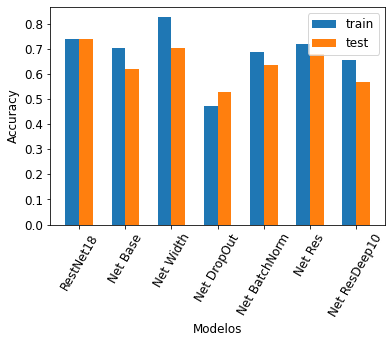

In [133]:
trn_acc = [v['train'] for k, v in parametro_dict.items()]
val_acc = [v['test'] for k, v in parametro_dict.items()]

width =0.3
#plt.figure(figsize=(30, 10), dpi=80)
plt.bar(np.arange(len(trn_acc)), trn_acc, width=width, label='train')
plt.bar(np.arange(len(val_acc))+ width, val_acc, width=width, label='test')
plt.xticks(np.arange(len(val_acc))+ width/2, list(parametro_dict.keys()),
           rotation=60)
plt.ylabel('Accuracy')
plt.xlabel("Modelos")
plt.legend(loc='upper right')
#plt.ylim(0.7, 1)
#plt.rcParams.update({'font.size': 30})

plt.savefig('Diferentes arquitecturas.png', bbox_inches='tight')
plt.show()

### Gráfico de cantidad de parámetros que tiene cada modelo
---

Me pareció interesante mostrar este aspecto de las redes y compararlos con su precisión, para saber si realmente tener más parámetros es igual a tener más precisión.
<br>
<br>
*Los valores de los parámetros fueron sacados de la función que te muestra las neuronas de cada capa*

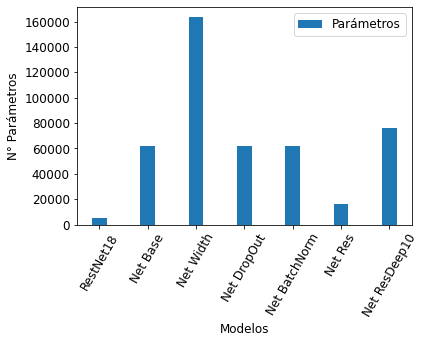

In [134]:

total_param_por_model={"RestNet18":5130,
"Net Base":62006,
"Net Width":163230,
"Net DropOut":62006,
"Net BatchNorm":62050,
"Net Res":16394, 
"Net ResDeep10":76074}
width =0.3
plt.bar(range(len(total_param_por_model)), list(total_param_por_model.values()), align='center',width=width, label='Parámetros')
plt.xticks(range(len(total_param_por_model)), list(total_param_por_model.keys()),rotation=60)

plt.ylabel('N° Parámetros')
plt.xlabel("Modelos")
plt.legend(loc='upper right')
plt.show()

### Conclusión:
<br>
Podemos ver que prácticamente todas las arquitecturas sobrepasaron a la arquitectura base, con excepción del DropOut que la igualó, esto es así ya que la misma necesita de más épocas para entrenarse mejor, experimentando con 100, 1000 épocas es posible obtener mejores resultados, pero esto llevaría demasiado tiempo.
<br>
También podemos ver como la cantidad de parámetros no tiene un relacion directa con la precisión, por ejemplo la "ResNet18" es una de la que tiene menos parámetros y la que tiene más precisión.
<br>
<br>
Desde mi punto de vista, yo utilizaría el modelo ya entrenado de ResNet18, ya que está implementado de fábrica en PyTorch, y su uso es bastante sencillo y brinda excelentes resultados. 

### Bibliografía:
<br>

- Libro: Deep learning with Pytorch, capítulos 1 al 8 incluido.
<br>
 ![Img](https://images.manning.com/264/352/resize/book/3/8e5d003-09e3-430e-a5a3-f42ee1cafb5f/Stevens-DLPy-HI.png)
 <br>
 <br>
- Pytorch: [Documentación](https://pytorch.org/docs/stable/index.html)<br>
    ![img](https://pytorch.org/tutorials/_static/img/thumbnails/cropped/profiler.png)

### Los puntos 6 y 8 se encuentra en otro archivo jupyter.